In [2]:
import matplotlib.pyplot as plt
from data_analysis import data_analysis
import numpy as np
import matplotlib.colors as colors
import sys
sys.path.append('../models')
plt.rcParams.update({'font.size': 16})

algo_colors = {'synchronous': plt.cm.viridis(0.1), 'naive': plt.cm.viridis(0.4), 'linear': plt.cm.viridis(0.6), 'sketch': plt.cm.viridis(0.8)}
algo_labels = {'synchronous': 'Synchronous', 'naive': 'Naive FDA', 'linear': 'Linear FDA', 'sketch': 'Sketch FDA'}
topology_colors = {'ring': plt.cm.viridis(0.1), 'binary_tree': plt.cm.viridis(0.5), 'star': plt.cm.viridis(0.8)}
topology_labels = {'ring': 'Ring', 'binary_tree': 'Binary Tree', 'star': 'Star'}

## Accuracy / Syncs
### Variable: clients

In [13]:
da = data_analysis("topology_expers")
accuracy_df = da.group_repeated_expers(['topology', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
accuracy_df = accuracy_df[accuracy_df['epoch']==50]
accuracy_df = accuracy_df[['topology', 'algorithm','time_mean']]
accuracy_df['time_mean'] = accuracy_df['time_mean'] / 60
accuracy_df['time_mean'] = accuracy_df['time_mean'].round(2)
pivot_df = accuracy_df.pivot_table(index='topology', columns='algorithm', values='time_mean', aggfunc='first')
pivot_df

algorithm    linear  naive  sketch  synchronous
topology                                       
binary_tree    3.44   3.43    4.26        19.27
ring           2.21   2.19    2.88        10.57
star          15.23  15.49   17.24       104.45

In [ ]:
accuracy_df = accuracy_df[accuracy_df['epoch']==50]
accuracy_df = accuracy_df[['clients', 'algorithm','time_mean']]
accuracy_df['time_mean'] = accuracy_df['time_mean'] / 60
accuracy_df['time_mean'] = accuracy_df['time_mean'].round(2)

pivot_df = accuracy_df.pivot_table(index='clients', columns='algorithm', values='time_mean', aggfunc='first')

desired_order = ['synchronous', 'naive', 'linear', 'sketch']
pivot_df = pivot_df[desired_order]

pivot_df = pivot_df.rename(columns={'synchronous': 'Synchronous'})
pivot_df = pivot_df.rename(columns={'naive': 'Naive FDA'})
pivot_df = pivot_df.rename(columns={'linear': 'Linear FDA'})
pivot_df = pivot_df.rename(columns={'sketch': 'Sketch FDA'})

# Drop the 'algorithm' column
pivot_df.columns.name = None

print(pivot_df)

latex_table = pivot_df.to_latex()

print(latex_table)

In [32]:
da = data_analysis("latest_expers")
da.select_where({'batch_size': 128, 'threshold': 50})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
accuracy_df = accuracy_df[accuracy_df['epoch']==50]
accuracy_df = accuracy_df[['clients', 'algorithm','time_mean']]
accuracy_df['time_mean'] = accuracy_df['time_mean'] / 60
accuracy_df['time_mean'] = accuracy_df['time_mean'].round(2)

pivot_df = accuracy_df.pivot_table(index='clients', columns='algorithm', values='time_mean', aggfunc='first')

desired_order = ['synchronous', 'naive', 'linear', 'sketch']
pivot_df = pivot_df[desired_order]

pivot_df = pivot_df.rename(columns={'synchronous': 'Synchronous'})
pivot_df = pivot_df.rename(columns={'naive': 'Naive FDA'})
pivot_df = pivot_df.rename(columns={'linear': 'Linear FDA'})
pivot_df = pivot_df.rename(columns={'sketch': 'Sketch FDA'})

# Drop the 'algorithm' column
pivot_df.columns.name = None

print(pivot_df)

latex_table = pivot_df.to_latex()

print(latex_table)


         Synchronous  Naive FDA  Linear FDA  Sketch FDA
clients                                                
4              21.93       5.72        6.00       10.20
8              22.17       3.03        3.16        5.51
16             16.62       1.63        1.70        2.93
32             10.59       0.90        0.92        1.61
\begin{tabular}{lrrrr}
\toprule
 & Synchronous & Naive FDA & Linear FDA & Sketch FDA \\
clients &  &  &  &  \\
\midrule
4 & 21.930000 & 5.720000 & 6.000000 & 10.200000 \\
8 & 22.170000 & 3.030000 & 3.160000 & 5.510000 \\
16 & 16.620000 & 1.630000 & 1.700000 & 2.930000 \\
32 & 10.590000 & 0.900000 & 0.920000 & 1.610000 \\
\bottomrule
\end{tabular}



In [33]:
da = data_analysis("latest_expers")
da.select_where({'clients': 16, 'threshold': 50})
accuracy_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
accuracy_df = accuracy_df[accuracy_df['epoch']==50]
accuracy_df = accuracy_df[['batch_size', 'algorithm','time_mean']]
accuracy_df['time_mean'] = accuracy_df['time_mean'] / 60
accuracy_df['time_mean'] = accuracy_df['time_mean'].round(2)

pivot_df = accuracy_df.pivot_table(index='batch_size', columns='algorithm', values='time_mean', aggfunc='first')

desired_order = ['synchronous', 'naive', 'linear', 'sketch']
pivot_df = pivot_df[desired_order]

pivot_df = pivot_df.rename(columns={'synchronous': 'Synchronous'})
pivot_df = pivot_df.rename(columns={'naive': 'Naive FDA'})
pivot_df = pivot_df.rename(columns={'linear': 'Linear FDA'})
pivot_df = pivot_df.rename(columns={'sketch': 'Sketch FDA'})

# Drop the 'algorithm' column
pivot_df.columns.name = None

print(pivot_df)

latex_table = pivot_df.to_latex()

print(latex_table)

            Synchronous  Naive FDA  Linear FDA  Sketch FDA
batch_size                                                
64                32.31       2.54        2.94        5.16
128               16.62       1.63        1.70        2.93
256                8.68       1.27        1.32        1.96
\begin{tabular}{lrrrr}
\toprule
 & Synchronous & Naive FDA & Linear FDA & Sketch FDA \\
batch_size &  &  &  &  \\
\midrule
64 & 32.310000 & 2.540000 & 2.940000 & 5.160000 \\
128 & 16.620000 & 1.630000 & 1.700000 & 2.930000 \\
256 & 8.680000 & 1.270000 & 1.320000 & 1.960000 \\
\bottomrule
\end{tabular}



In [34]:
da = data_analysis("latest_expers")
da.select_where({'clients': 16, 'batch_size': 128})
accuracy_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
accuracy_df = accuracy_df[accuracy_df['epoch']==50]
accuracy_df = accuracy_df[['threshold', 'algorithm','time_mean']]
accuracy_df['time_mean'] = accuracy_df['time_mean'] / 60
accuracy_df['time_mean'] = accuracy_df['time_mean'].round(2)

pivot_df = accuracy_df.pivot_table(index='threshold', columns='algorithm', values='time_mean', aggfunc='first')

desired_order = ['naive', 'linear', 'sketch']
pivot_df = pivot_df[desired_order]

pivot_df = pivot_df.rename(columns={'naive': 'Naive FDA'})
pivot_df = pivot_df.rename(columns={'linear': 'Linear FDA'})
pivot_df = pivot_df.rename(columns={'sketch': 'Sketch FDA'})

# Drop the 'algorithm' column
pivot_df.columns.name = None

print(pivot_df)

latex_table = pivot_df.to_latex()

print(latex_table)

           Naive FDA  Linear FDA  Sketch FDA
threshold                                   
1.0             4.30        4.35        5.59
25.0            1.80        1.86        3.11
50.0            1.63        1.70        2.93
100.0           1.54        1.61        2.82
200.0           1.49        1.57        2.80
\begin{tabular}{lrrr}
\toprule
 & Naive FDA & Linear FDA & Sketch FDA \\
threshold &  &  &  \\
\midrule
1.000000 & 4.300000 & 4.350000 & 5.590000 \\
25.000000 & 1.800000 & 1.860000 & 3.110000 \\
50.000000 & 1.630000 & 1.700000 & 2.930000 \\
100.000000 & 1.540000 & 1.610000 & 2.820000 \\
200.000000 & 1.490000 & 1.570000 & 2.800000 \\
\bottomrule
\end{tabular}



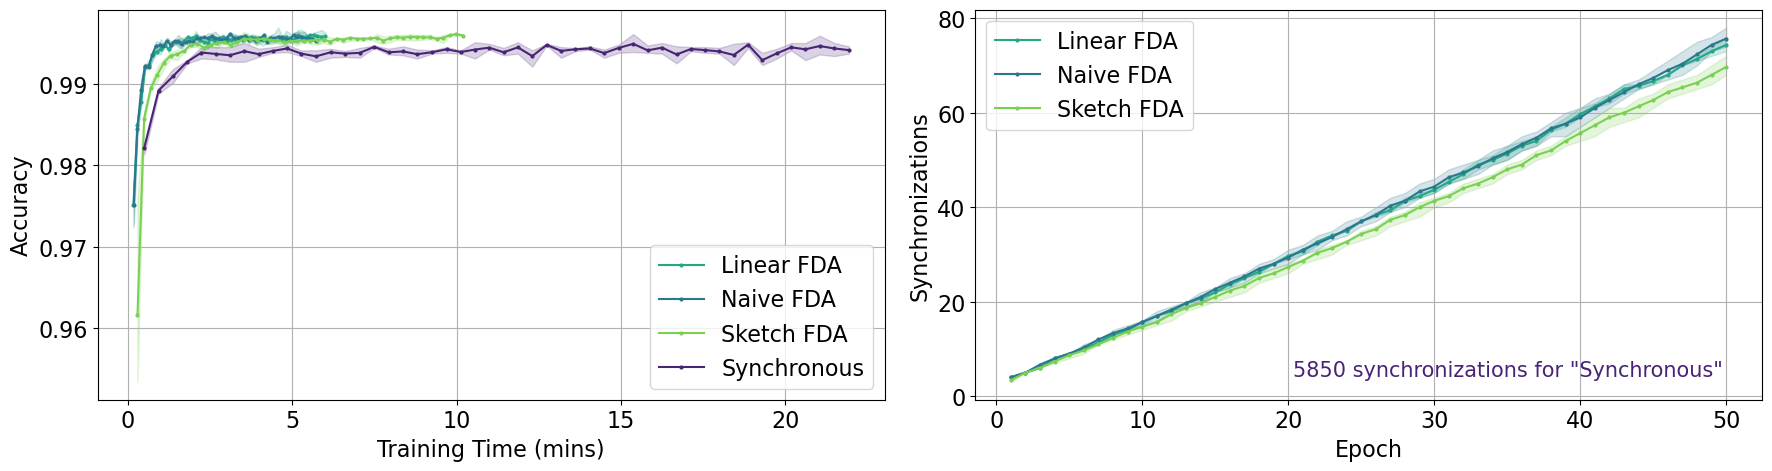

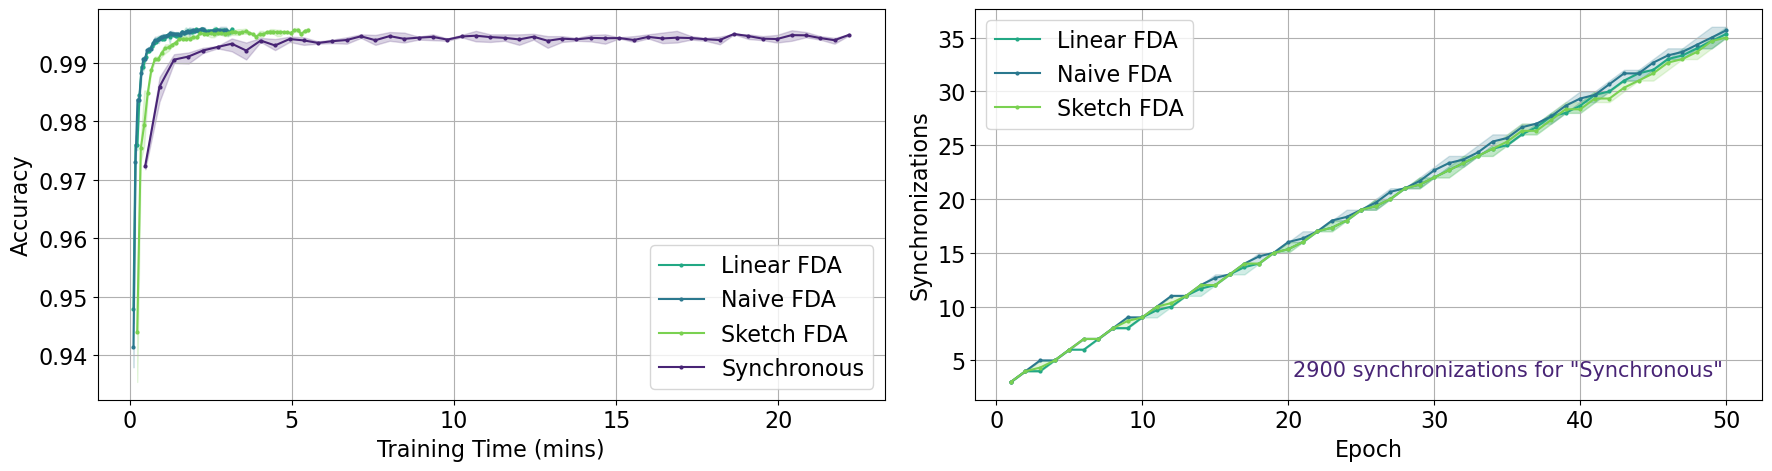

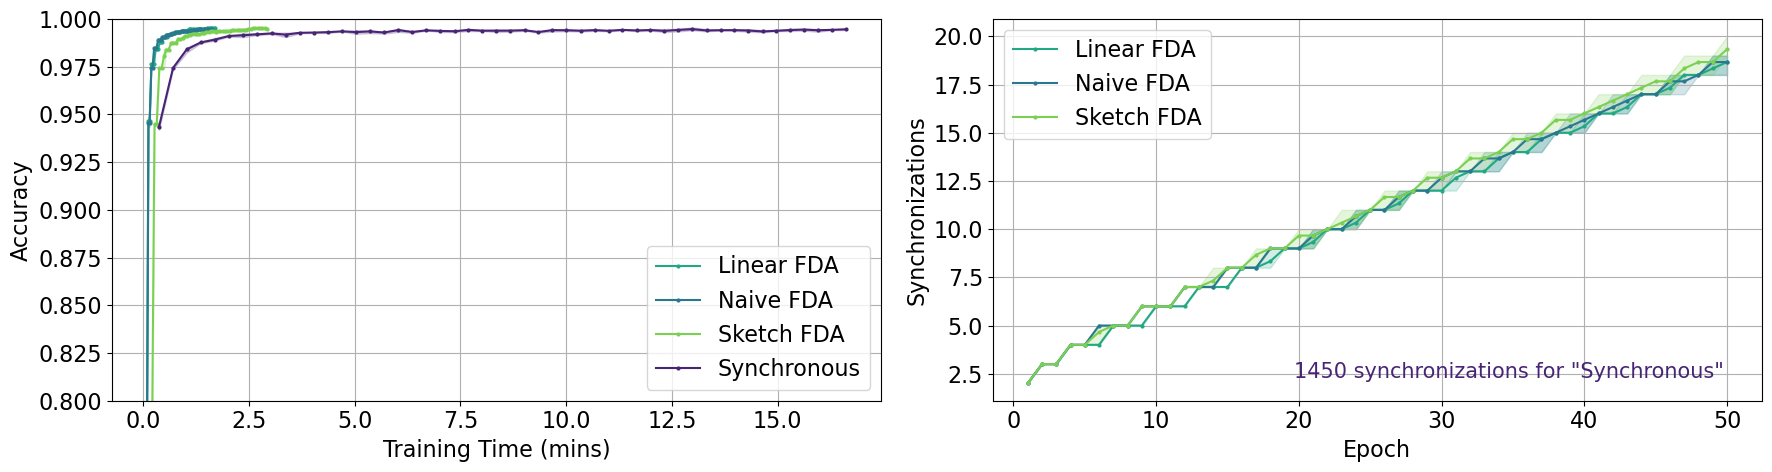

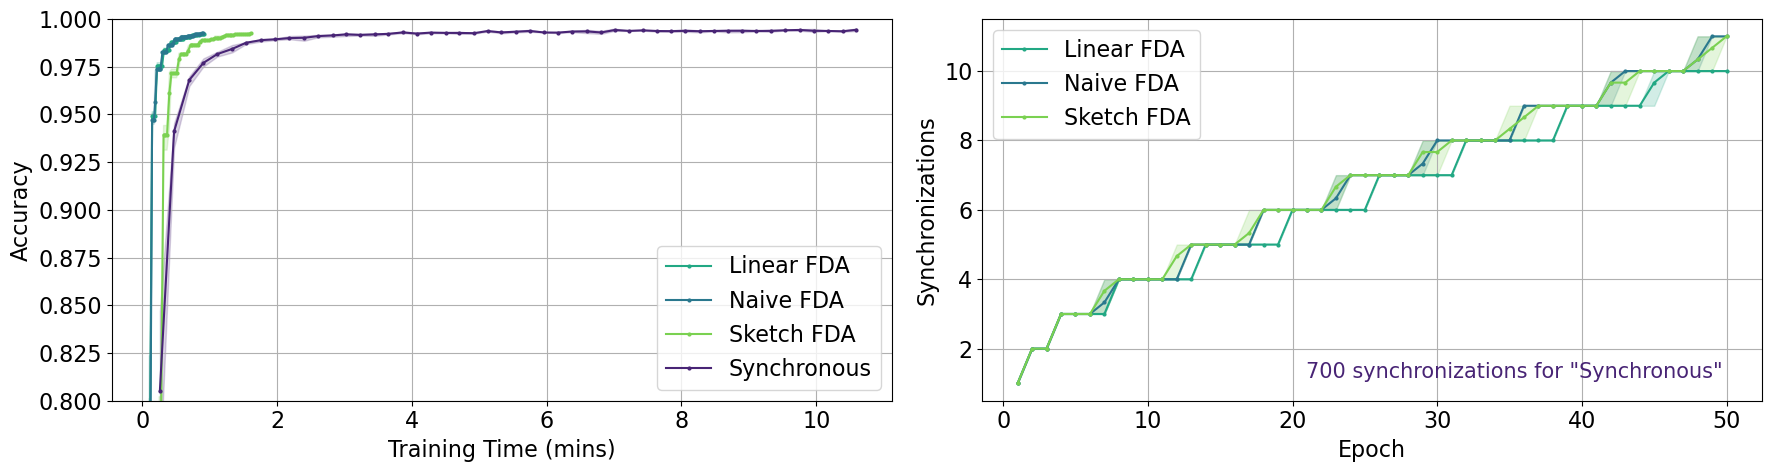

In [24]:
da = data_analysis("latest_expers")
da.select_where({'batch_size': 128, 'threshold': 50})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
syncs_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch', 'epoch_steps'], 'epoch', 'syncs_y', True)
accuracy_df = accuracy_df[accuracy_df['epoch']<51]
distinct_clients = da.df['info']['clients'].unique()
plt.rcParams.update({'font.size': 16})


# For each individual number of clients
for clients in distinct_clients:
    # Filter the DataFrame for rows where 'clients' column is equal to the current 'clients'
    filtered_accuracy_df = accuracy_df[accuracy_df['clients'] == clients]
    filtered_syncs_df = syncs_df[(syncs_df['clients'] == clients) & (syncs_df['algorithm'] != 'synchronous')]

    # Create a new figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], marker='o', markersize=2, color=algo_colors[key])
        ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])
        if key == 'sketch':
            if group['accuracy_mean'].iloc[0] < 0.8:
                ax1.set_ylim(0.8,1)

    # Add title, labels, and legend for the first subplot
    ax1.set_xlabel("Training Time (mins)")
    ax1.set_ylabel("Accuracy")

    ax1.legend()

    # Plot for filtered_syncs_df
    for key, group in filtered_syncs_df.groupby('algorithm'):
        ax2.plot(group['epoch'], group['syncs_y_mean'], label=algo_labels[key], marker='o', markersize=2, color=algo_colors[key])
        ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])
        if key == 'linear':
            steps = group['epoch_steps'].iloc[-1] * 50
            ax2.text(0.95, 0.05, str(steps)+" synchronizations for \"Synchronous\"", ha='right', va='bottom', transform=ax2.transAxes, fontsize=15, color=algo_colors["synchronous"])


    # Add title, labels, and legend for the second subplot
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Synchronizations")
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    ax1.grid()
    ax2.grid()

    plt.savefig("figures/accuracy_syncs-clients_"+str(clients)+".pdf")

### Variable: batch size

0.767633338769277
0.8567000031471252
0.36456666390101117


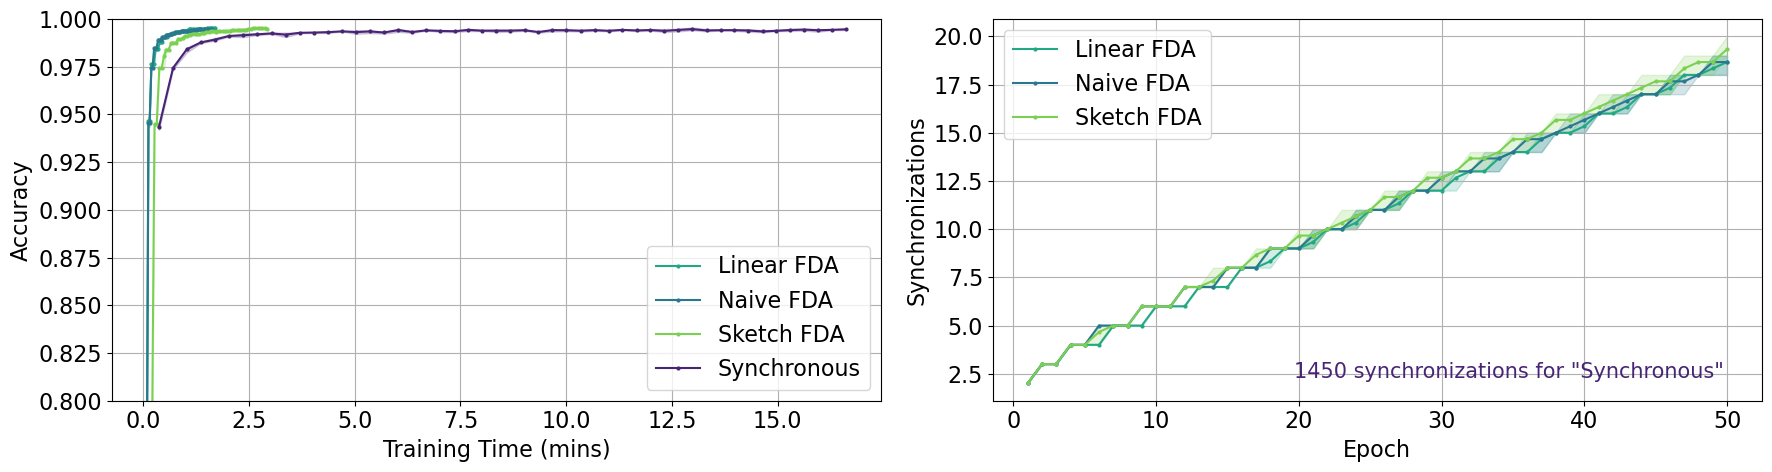

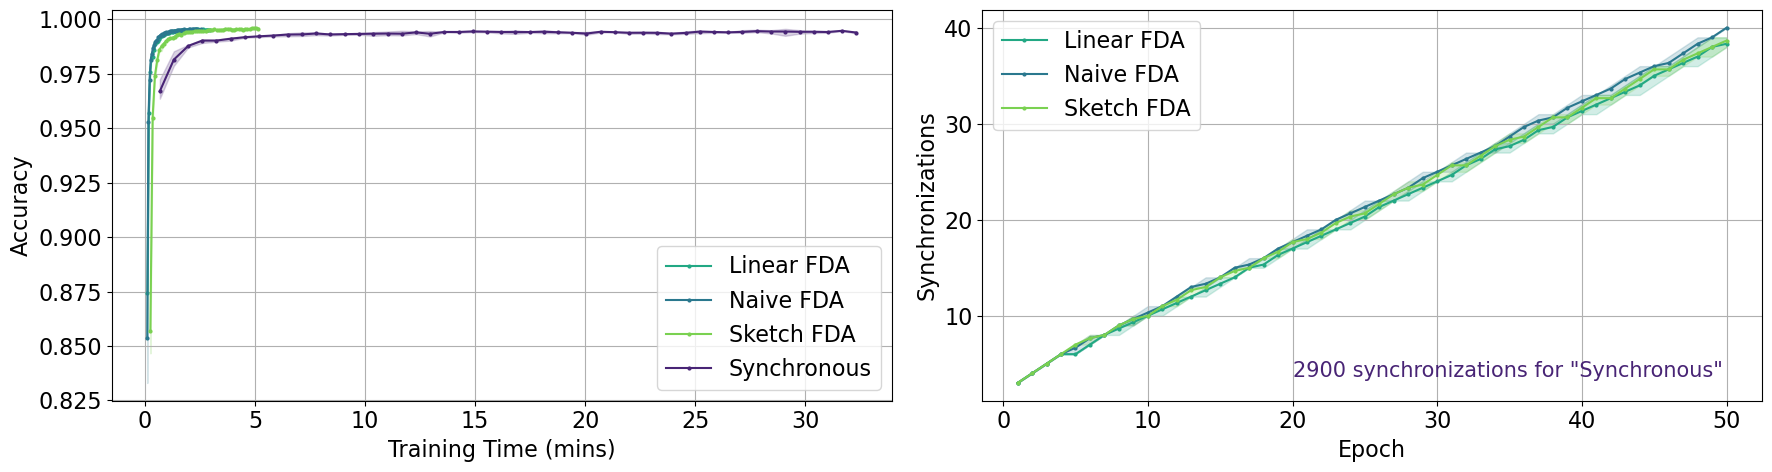

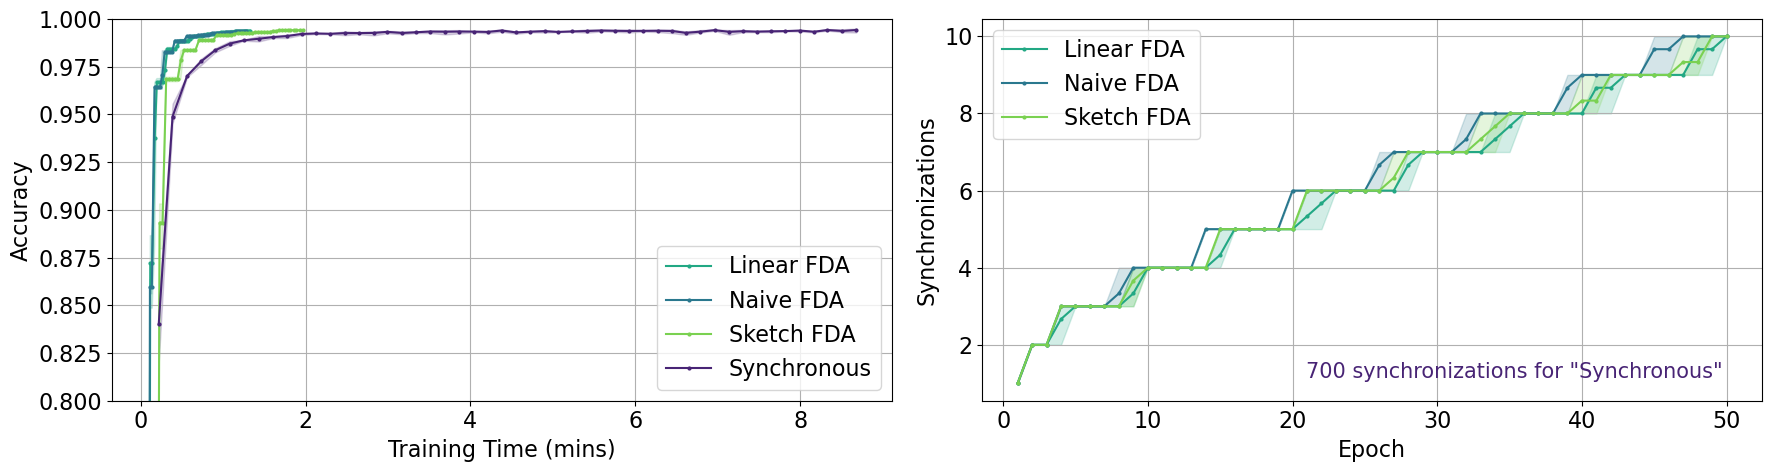

In [25]:
da = data_analysis("latest_expers")
da.select_where({'clients': 16, 'threshold': 50})
accuracy_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
syncs_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch', 'epoch_steps'], 'epoch', 'syncs_y', True)
accuracy_df = accuracy_df[accuracy_df['epoch']<51]
distinct_batch_size = da.df['info']['batch_size'].unique()
plt.rcParams.update({'font.size': 16})


# For each individual number of batch_size
for batch_size in distinct_batch_size:
    # Filter the DataFrame for rows where 'batch_size' column is equal to the current 'batch_size'
    filtered_accuracy_df = accuracy_df[accuracy_df['batch_size'] == batch_size]
    filtered_syncs_df = syncs_df[(syncs_df['batch_size'] == batch_size) & (syncs_df['algorithm'] != 'synchronous')]

    # Create a new figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], marker='o', markersize=2, color=algo_colors[key])
        ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])
        if key == 'sketch':
            print(group['accuracy_mean'].iloc[0])
            if group['accuracy_mean'].iloc[0] < 0.8:
                ax1.set_ylim(0.8,1)

    # Add title, labels, and legend for the first subplot
    ax1.set_xlabel("Training Time (mins)")
    ax1.set_ylabel("Accuracy")
    ax1.legend()

    # Plot for filtered_syncs_df
    for key, group in filtered_syncs_df.groupby('algorithm'):
        ax2.plot(group['epoch'], group['syncs_y_mean'], marker='o', markersize=2, label=algo_labels[key], color=algo_colors[key])
        ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])
        if key == 'linear':
            steps = group['epoch_steps'].iloc[-1] * 50
            ax2.text(0.95, 0.05, str(steps)+" synchronizations for \"Synchronous\"", ha='right', va='bottom', transform=ax2.transAxes, fontsize=15, color=algo_colors["synchronous"])

    # Add title, labels, and legend for the second subplot
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Synchronizations")
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    ax1.grid()
    ax2.grid()

    plt.savefig("figures/accuracy_syncs-batch_size_"+str(batch_size)+".pdf")


### Variable: threshold

0.767633338769277
0.9250333507855734
0.7828333179155985
0.13610000163316718
0.26923334101835883


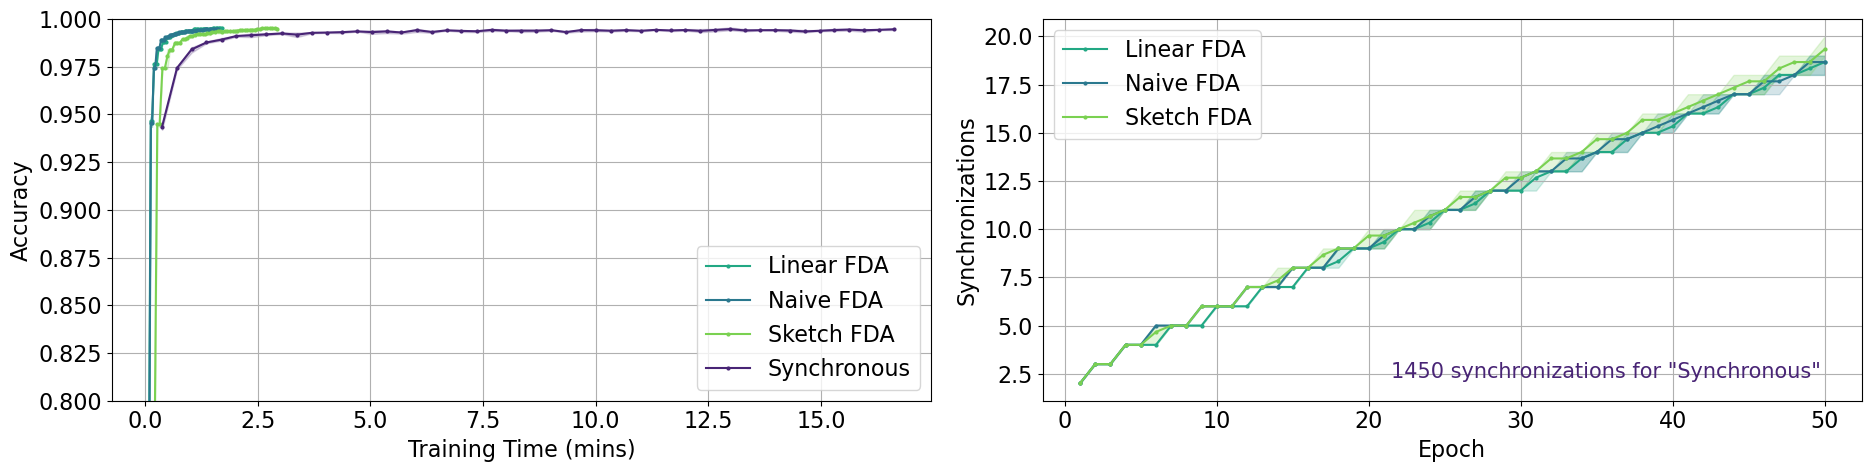

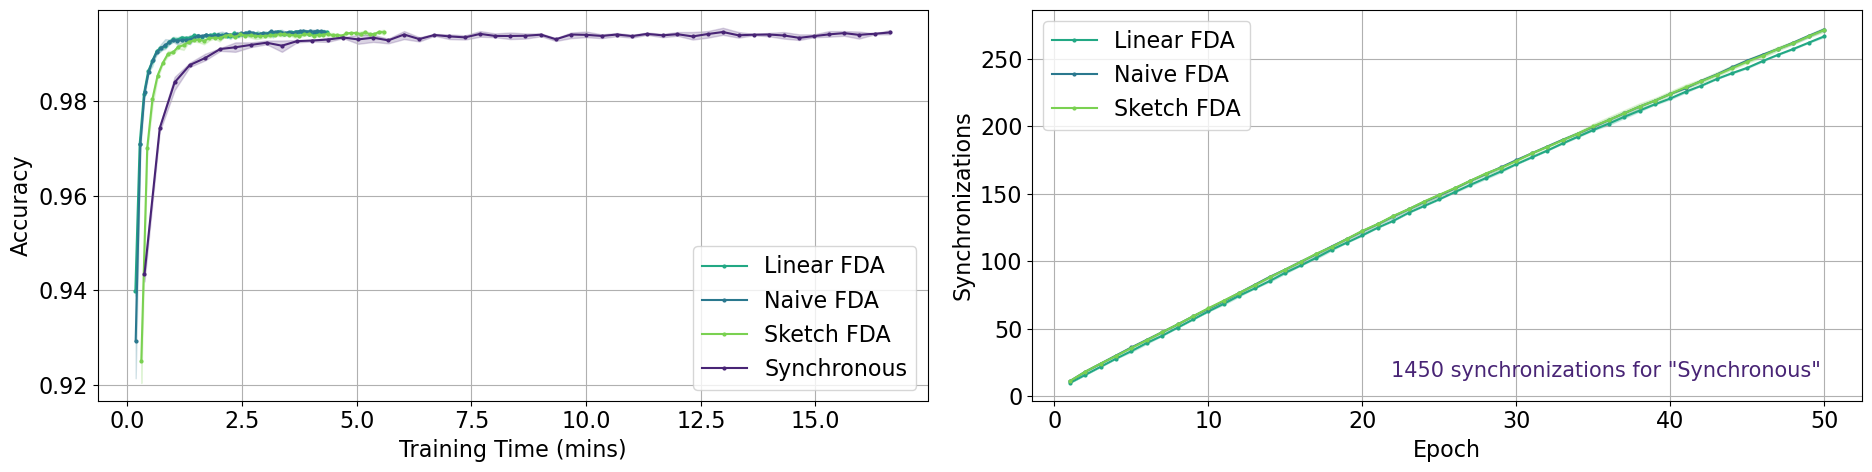

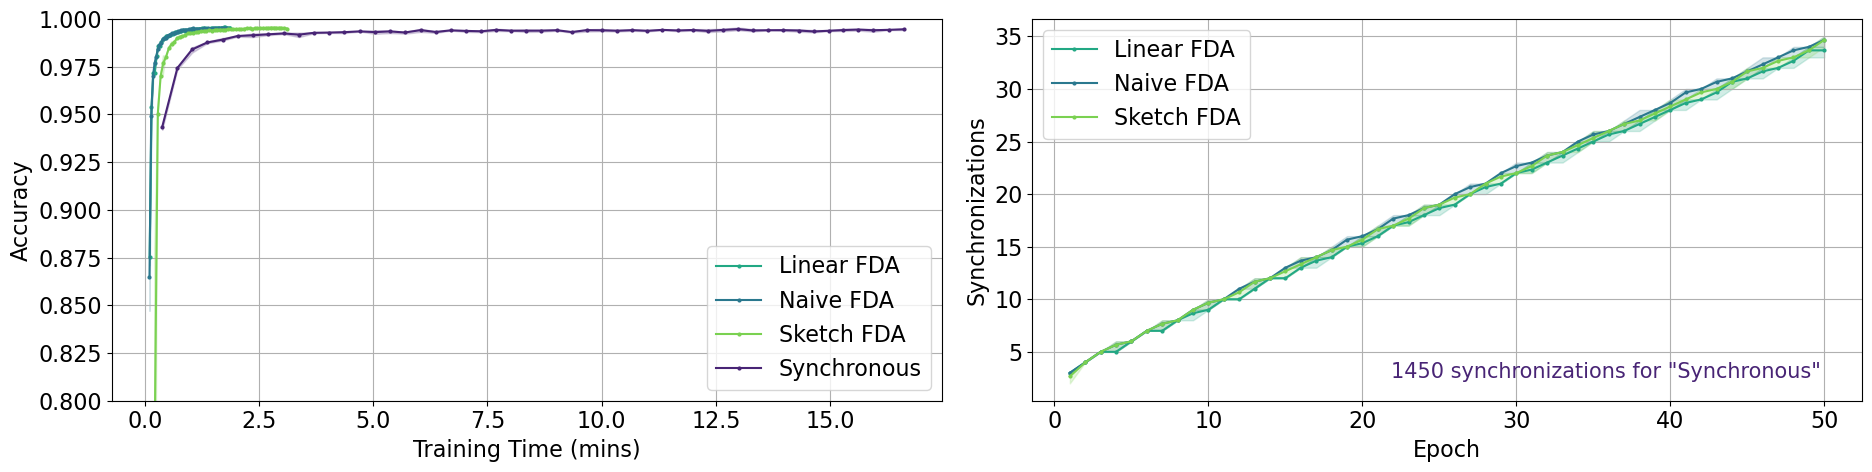

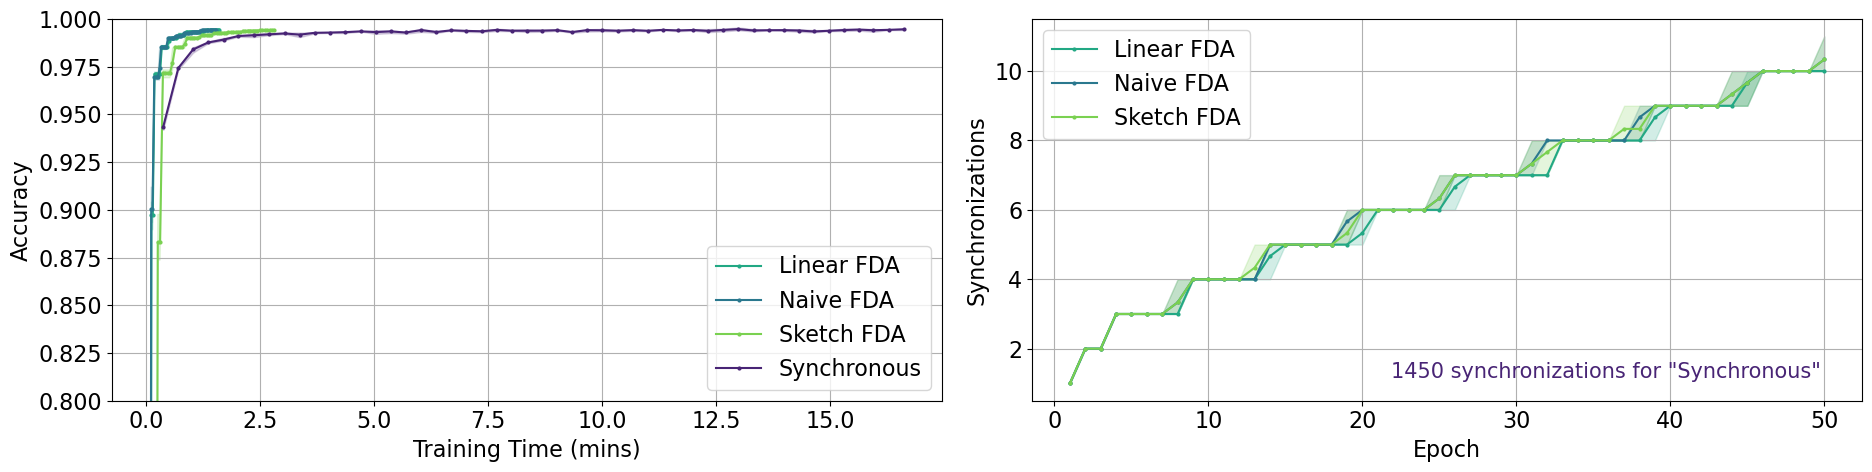

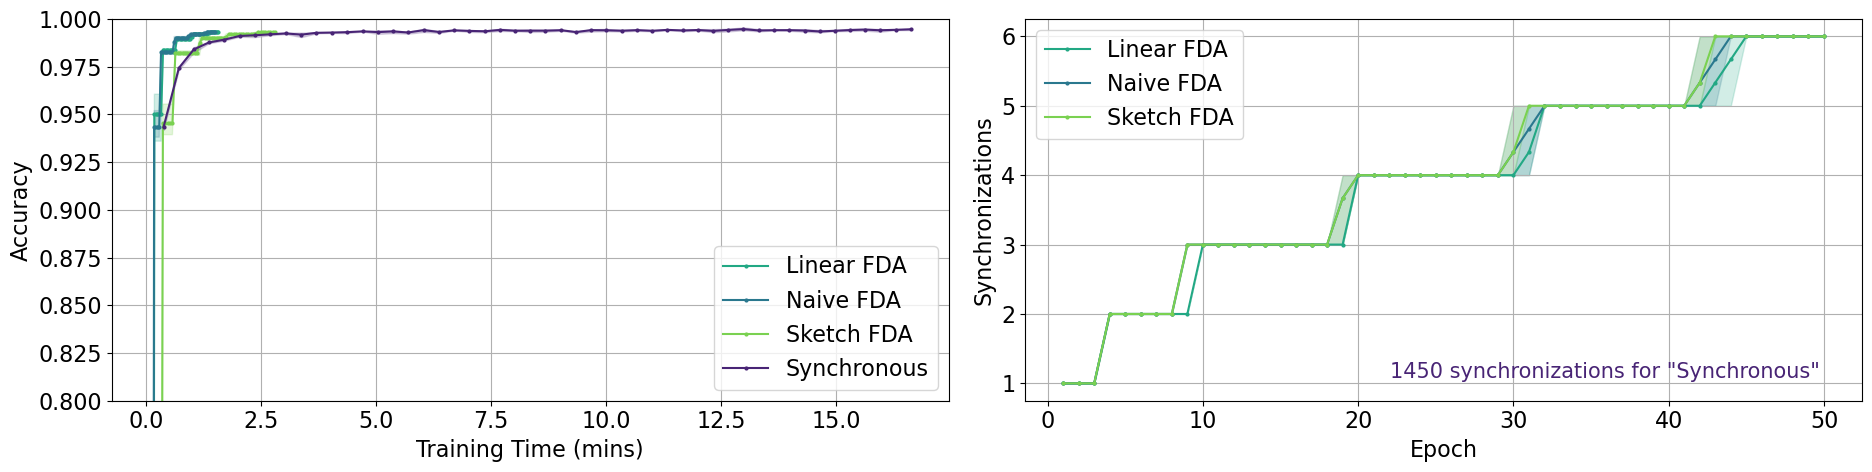

In [26]:
da = data_analysis("latest_expers")
da.select_where({'clients': 16, 'batch_size': 128})
accuracy_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
syncs_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch', 'epoch_steps'], 'epoch', 'syncs_y', True)
accuracy_df = accuracy_df[accuracy_df['epoch']<51]
distinct_threshold = da.df['info'].dropna()['threshold'].unique()
plt.rcParams.update({'font.size': 16})


# For each individual number of threshold
for threshold in distinct_threshold:
    # Filter the DataFrame for rows where 'threshold' column is equal to the current 'threshold'
    filtered_accuracy_df = accuracy_df[(accuracy_df['threshold'] == threshold) | (accuracy_df['threshold'].isna())]
    filtered_syncs_df = syncs_df[(syncs_df['threshold'] == threshold) & (syncs_df['algorithm'] != 'synchronous')]

    # Create a new figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], marker='o', markersize=2, color=algo_colors[key])
        ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])
        if key == 'sketch':
            print(group['accuracy_mean'].iloc[0])
            if group['accuracy_mean'].iloc[0] < 0.8:
                ax1.set_ylim(0.8,1)

    # Add title, labels, and legend for the first subplot
    ax1.set_xlabel("Training Time (mins)")
    ax1.set_ylabel("Accuracy")
    ax1.legend()

    # Plot for filtered_syncs_df
    for key, group in filtered_syncs_df.groupby('algorithm'):
        ax2.plot(group['epoch'], group['syncs_y_mean'], marker='o', markersize=2, label=algo_labels[key], color=algo_colors[key])
        ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])
        if key == 'linear':
            steps = group['epoch_steps'].iloc[-1] * 50
            ax2.text(0.95, 0.05, str(steps)+" synchronizations for \"Synchronous\"", ha='right', va='bottom', transform=ax2.transAxes, fontsize=15, color=algo_colors["synchronous"])

    # Add title, labels, and legend for the second subplot
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Synchronizations")
    ax2.legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    ax1.grid()
    ax2.grid()

    plt.savefig("figures/accuracy_syncs-threshold_"+str(threshold)+".pdf")

## Syncs over Clients / Batch Size

In [33]:
da = data_analysis("latest_expers")
da.select_where({'threshold': 50})
syncs_df = da.group_repeated_expers(['threshold', 'epoch', 'batch_size', 'clients'], 'epoch', 'syncs_y', True)
syncs_df = syncs_df[ (syncs_df['epoch']==50) & (syncs_df['threshold'].notna())]
syncs_df = syncs_df[['clients', 'batch_size', 'syncs_y_mean']]
numpy_array = syncs_df.values
plt.rcParams.update({'font.size': 10})
syncs_df

clients  batch_size  syncs_y_mean
588        4          64    161.000000
589        8          64     78.444444
590       16          64     39.000000
591       32          64     20.777778
592        4         128     73.222222
593        8         128     35.333333
594       16         128     18.888889
595       32         128     10.666667
596        4         256     32.000000
597        8         256     17.000000
598       16         256     10.000000
599       32         256      6.000000

## scatter

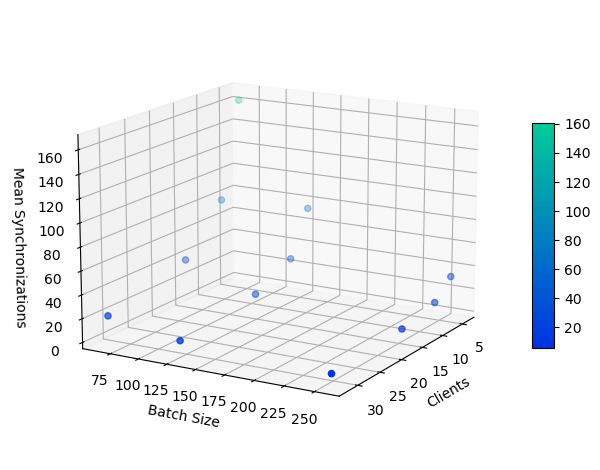

In [34]:
# Extracting columns from the numpy array
clients = numpy_array[:, 0]
batch_size = numpy_array[:, 1]
syncs_y_mean = numpy_array[:, 2]

# Creating a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

new_cmap = truncate_colormap(plt.cm.winter, 0.2, 0.8)

# Scatter plot
scatter = ax.scatter(clients, batch_size, syncs_y_mean, c=syncs_y_mean, cmap=new_cmap)

# Adding labels
ax.set_xlabel('Clients')
ax.set_ylabel('Batch Size')
ax.set_zlabel('Mean Synchronizations')

# Adding a colorbar
fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)

# Set a specific view (elevation, azimuthal angle)
ax.view_init(elev=15, azim=30)

# Show the plot
plt.grid()
plt.tight_layout()
plt.savefig("figures/mean_syncs.pdf")

## Time until 99.5 Accuracy

48
48


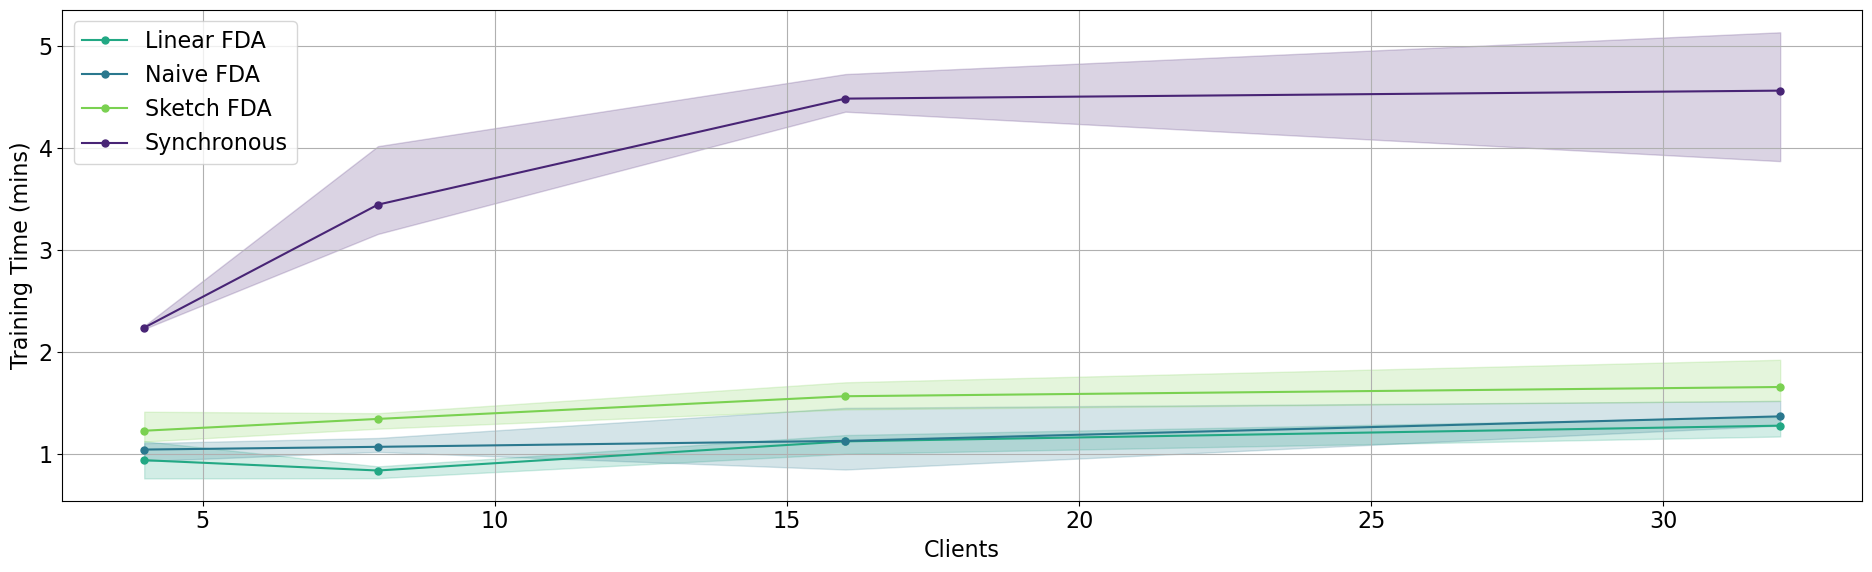

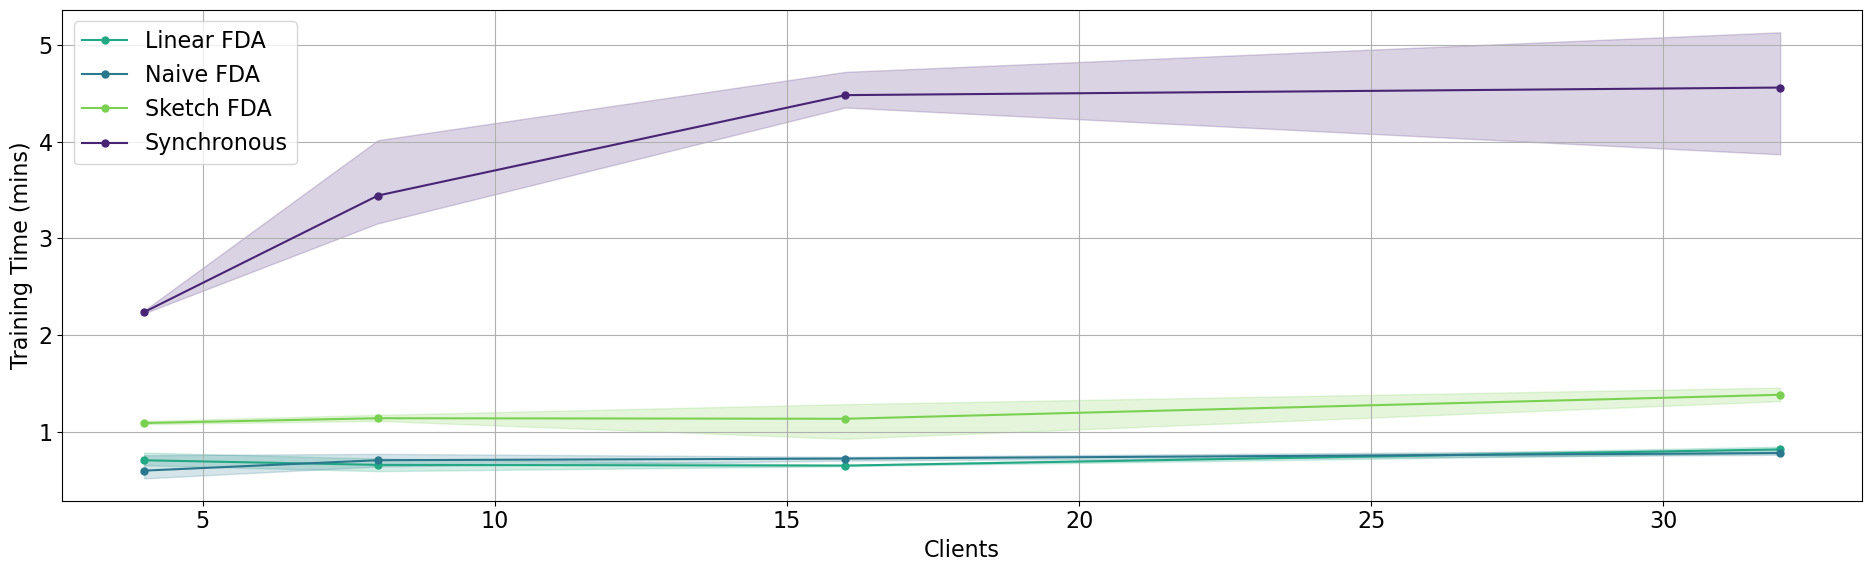

In [6]:
for threshold in (1,25):
    da = data_analysis("latest_expers")
    da.select_where({'threshold': threshold, 'batch_size': 128})
    accuracy_df = da.df['epoch']
    result_df = accuracy_df.groupby('exper_id').apply(lambda group: group[group['accuracy'] > 0.993].iloc[0])
    result_df = result_df[['clients', 'algorithm', 'time']]
    print(result_df.shape[0])
    plt.rcParams.update({'font.size': 16})


    # Group by 'clients' and 'algorithm', and calculate mean, min, and max for 'time'
    agg_df = result_df.groupby(['clients', 'algorithm'])['time'].agg(['mean', 'min', 'max']).reset_index()

    # Rename the columns for clarity
    agg_df.columns = ['clients', 'algorithm', 'mean_time', 'min_time', 'max_time']

    plt.figure(figsize=(19, 6))

    # Plot for filtered_accuracy_df
    for key, group in agg_df.groupby('algorithm'):
        plt.plot(group['clients'], group['mean_time'] / 60, marker='o', markersize=5, label=algo_labels[key], color=algo_colors[key])
        plt.fill_between(group['clients'], group['min_time']/60, group['max_time']/60, alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    plt.xlabel("Clients")
    plt.ylabel("Training Time (mins)")
    plt.legend()

    # Show the plot
    plt.grid()
    plt.tight_layout()
    plt.savefig("figures/training_time_0993_threshold_"+str(threshold)+".pdf")



## Batch Size for clients: 4, 8, 32

0.9616000056266785
0.9772666692733765
0.8969999949137369
0.9440333247184753
0.953000009059906
0.8890333374341329
0.29916666448116297
0.6051999926567078
0.2803333302338918


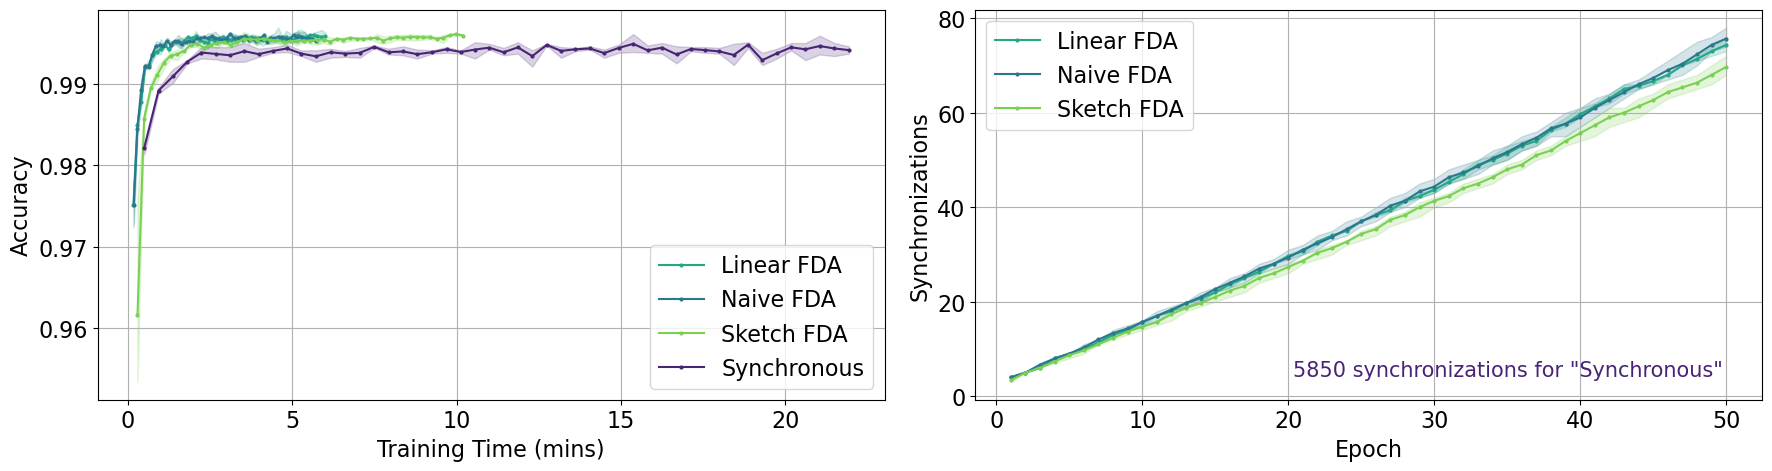

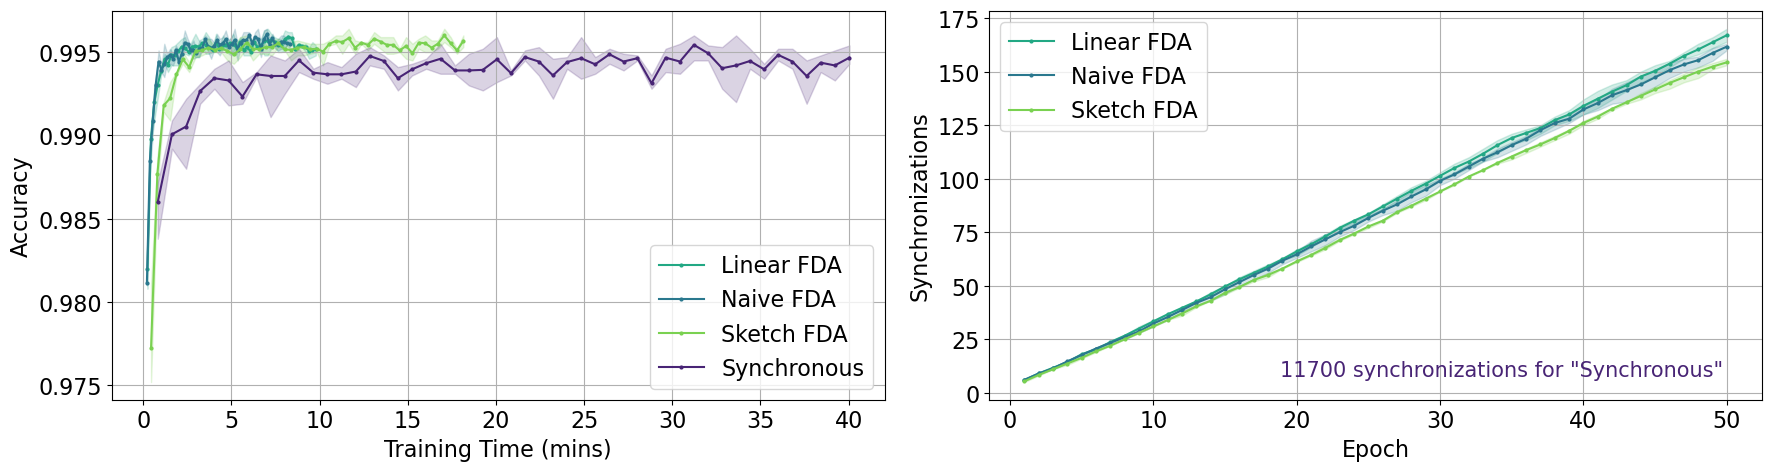

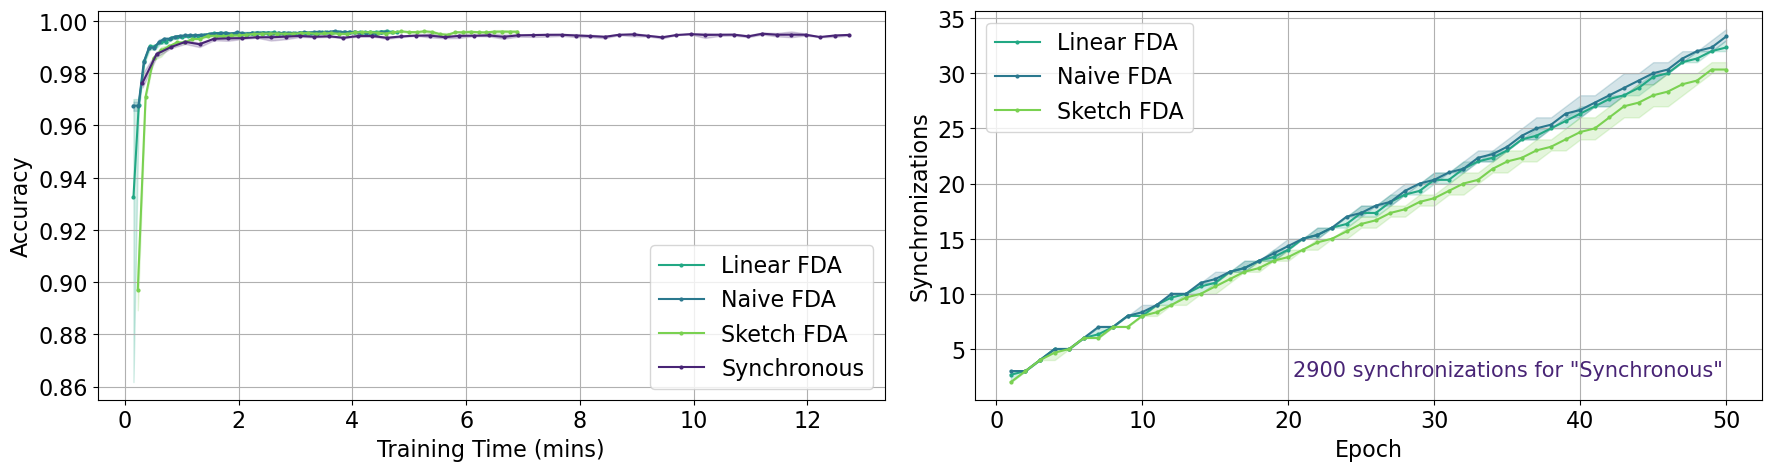

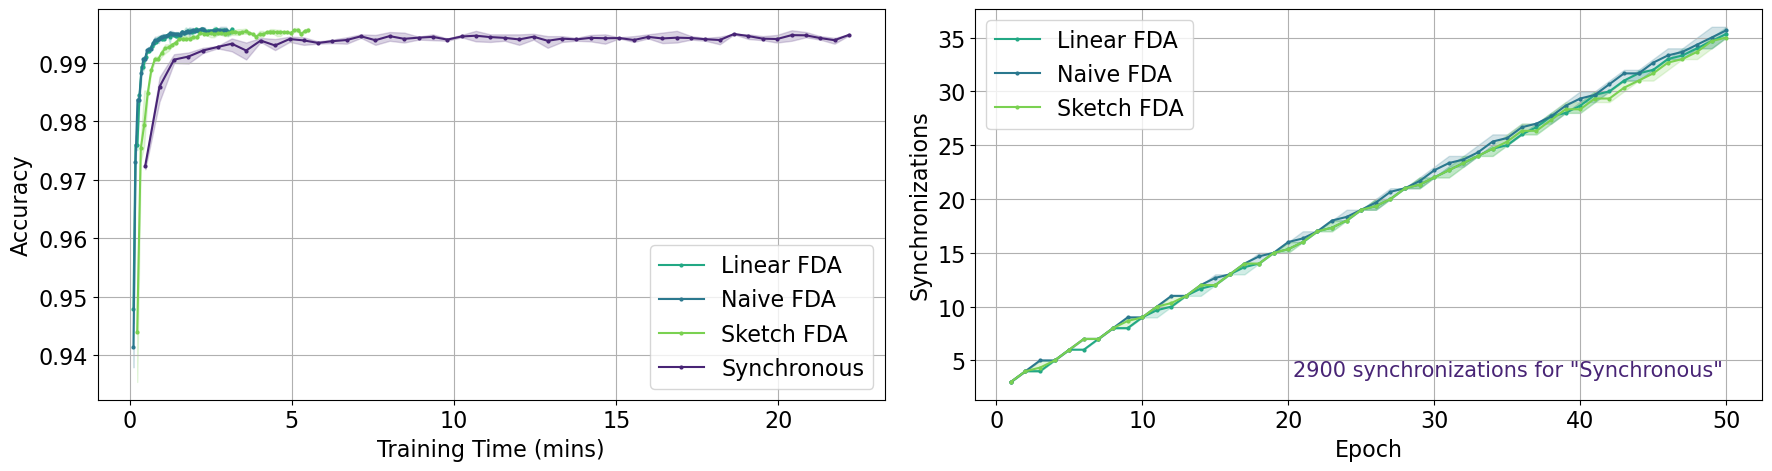

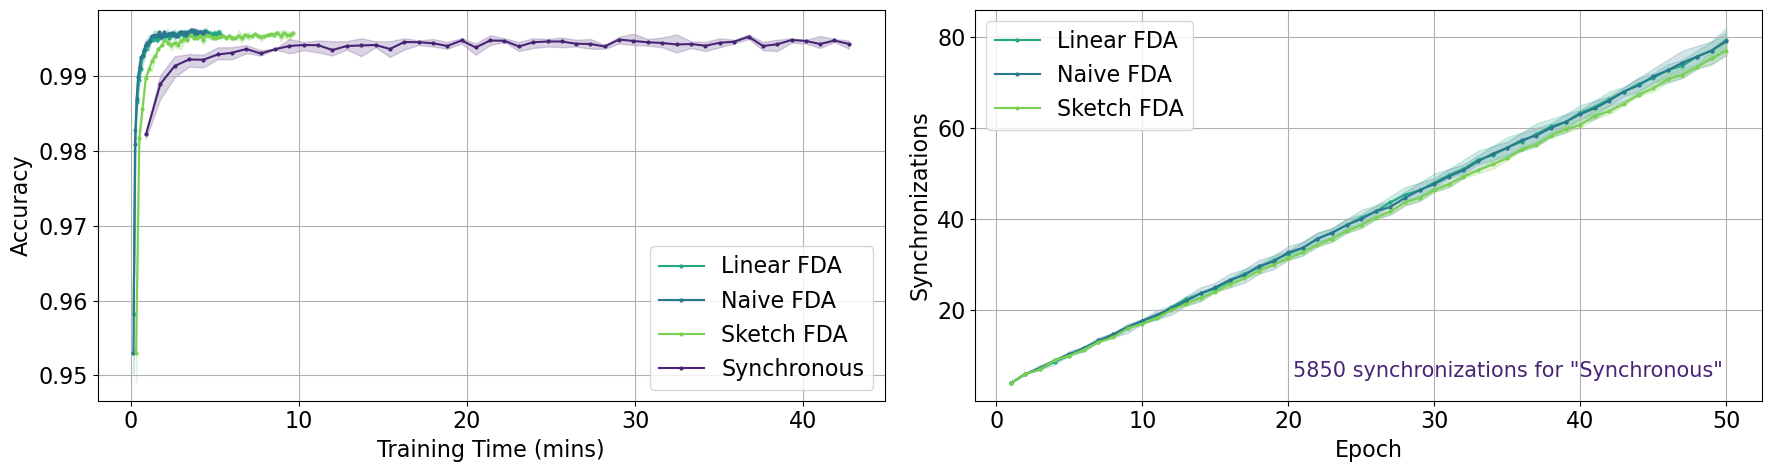

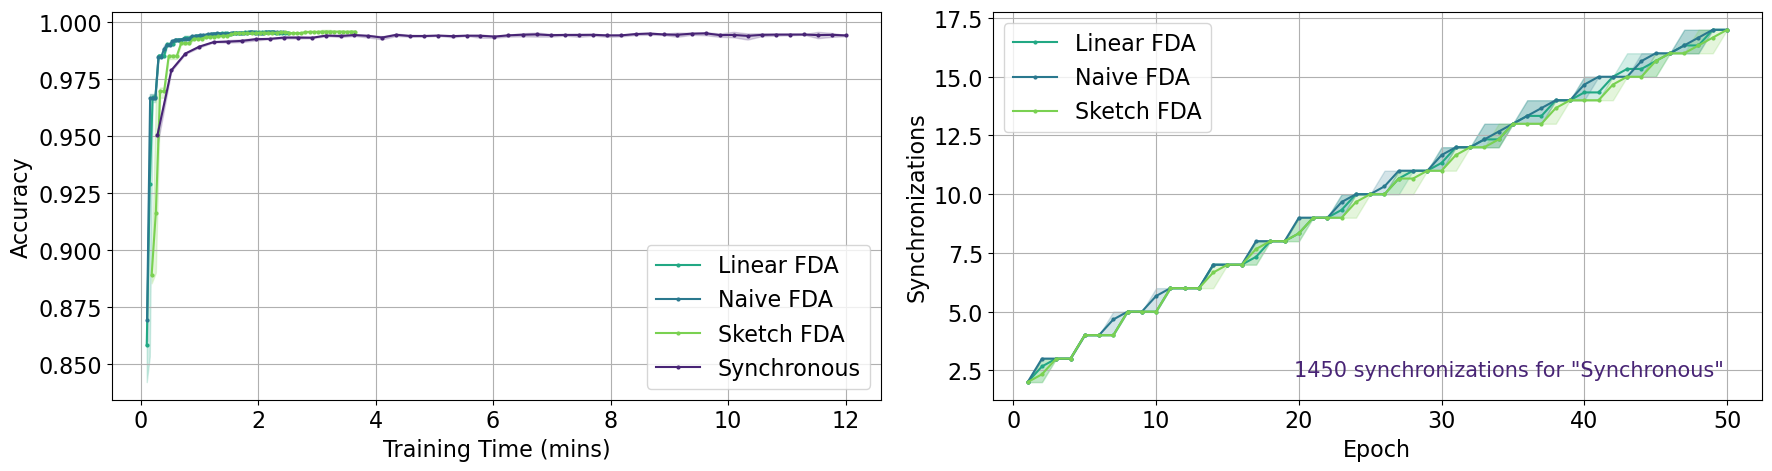

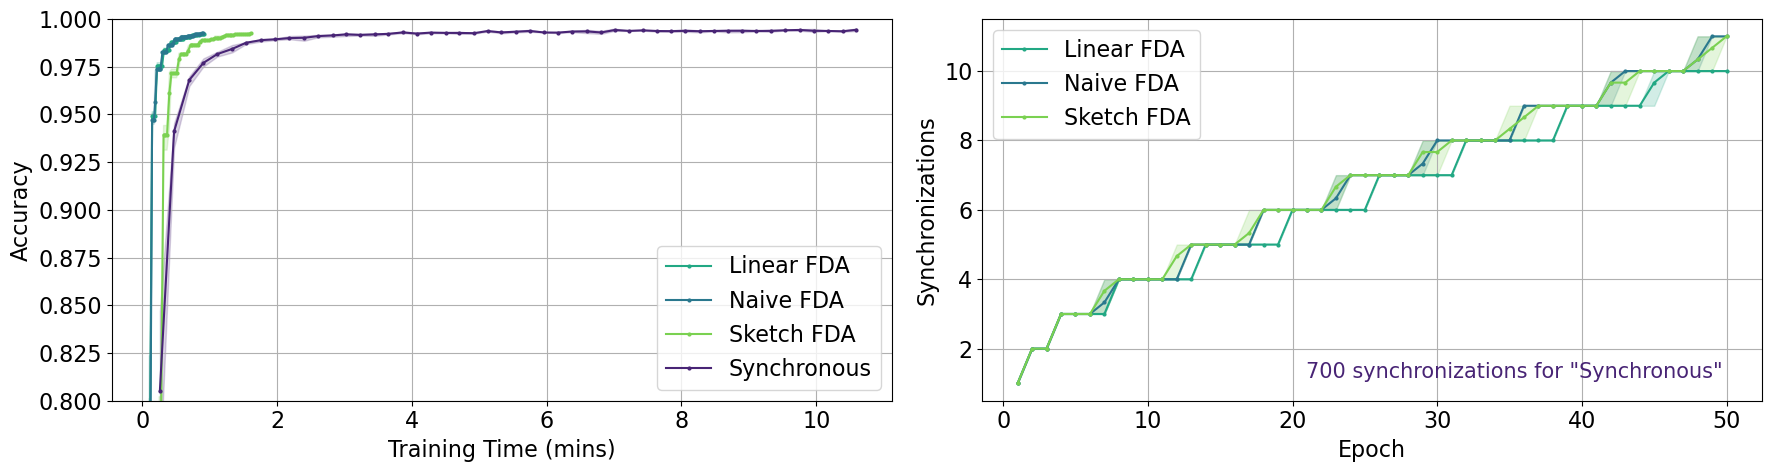

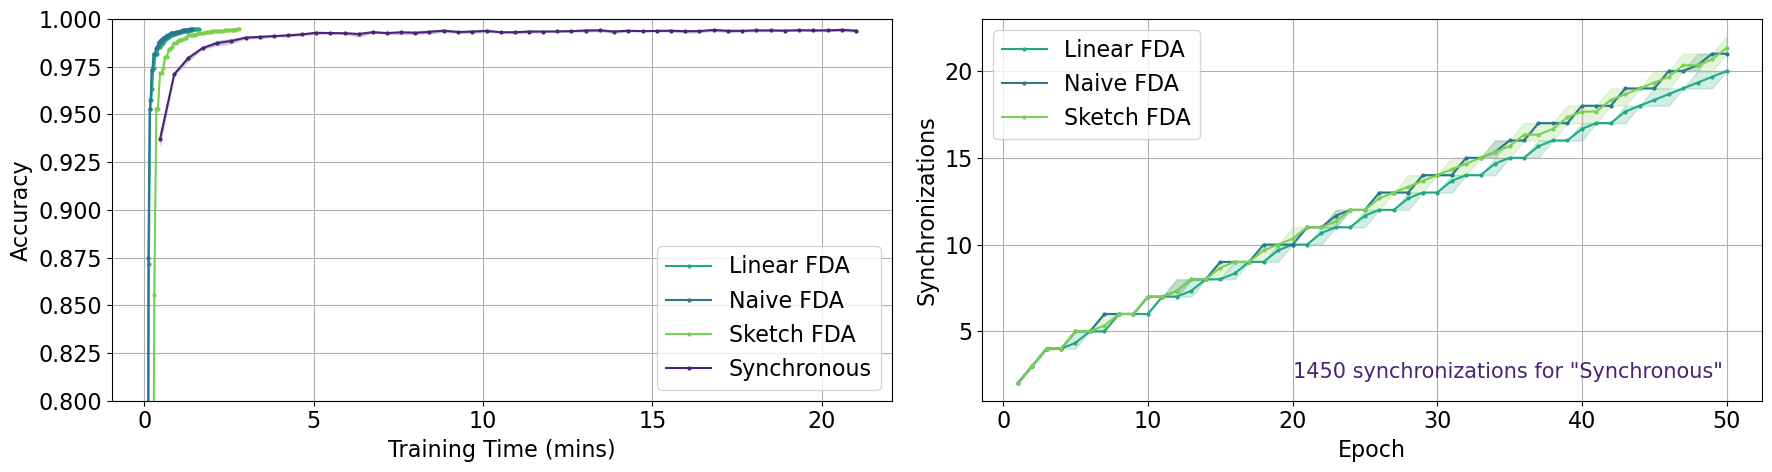

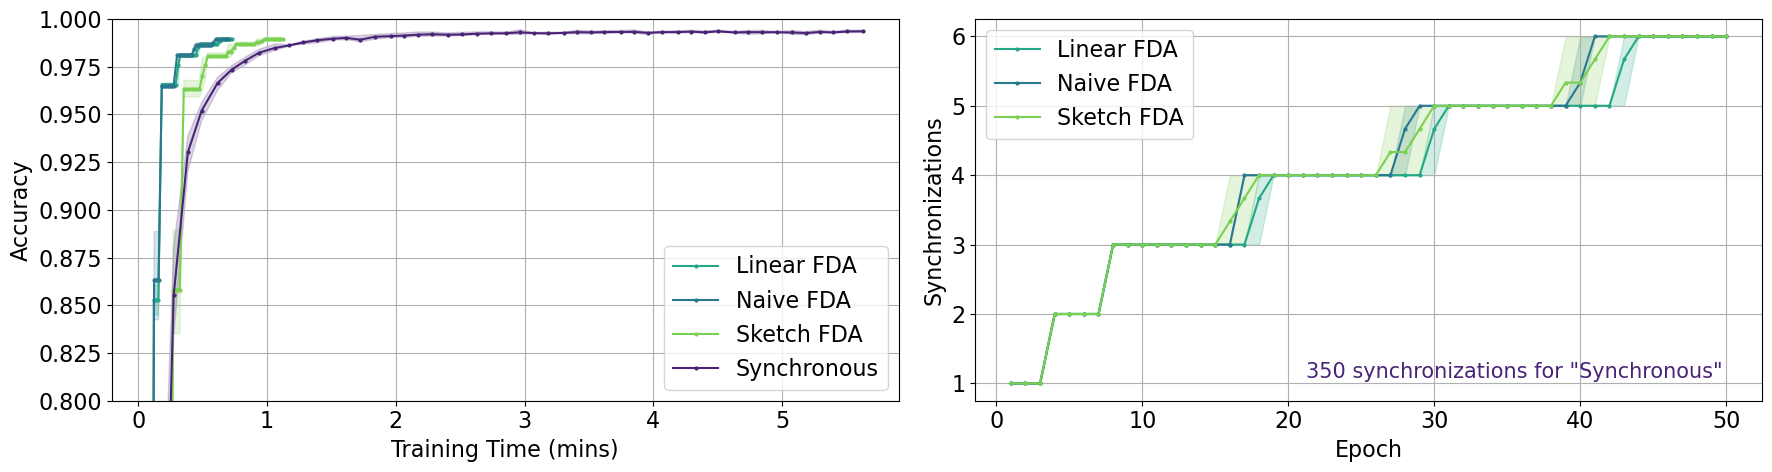

In [27]:
plt.rcParams.update({'font.size': 16})
for clients in (4, 8, 32):
    da = data_analysis("latest_expers")
    da.select_where({'clients': clients, 'threshold': 50})
    accuracy_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
    syncs_df = da.group_repeated_expers(['batch_size', 'algorithm', 'epoch', 'epoch_steps'], 'epoch', 'syncs_y', True)
    accuracy_df = accuracy_df[accuracy_df['epoch']<51]
    distinct_batch_size = da.df['info']['batch_size'].unique()
    plt.rcParams.update({'font.size': 16})


    # For each individual number of batch_size
    for batch_size in distinct_batch_size:
        # Filter the DataFrame for rows where 'batch_size' column is equal to the current 'batch_size'
        filtered_accuracy_df = accuracy_df[accuracy_df['batch_size'] == batch_size]
        filtered_syncs_df = syncs_df[(syncs_df['batch_size'] == batch_size) & (syncs_df['algorithm'] != 'synchronous')]

        # Create a new figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

        # Plot for filtered_accuracy_df
        for key, group in filtered_accuracy_df.groupby('algorithm'):
            ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], marker='o', markersize=2, color=algo_colors[key])
            ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])
            if key == 'sketch':
                print(group['accuracy_mean'].iloc[0])
                if group['accuracy_mean'].iloc[0] < 0.8:
                    ax1.set_ylim(0.8,1)

        # Add title, labels, and legend for the first subplot
        ax1.set_xlabel("Training Time (mins)")
        ax1.set_ylabel("Accuracy")
        ax1.legend()

        # Plot for filtered_syncs_df
        for key, group in filtered_syncs_df.groupby('algorithm'):
            ax2.plot(group['epoch'], group['syncs_y_mean'], marker='o', markersize=2, label=algo_labels[key], color=algo_colors[key])
            ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])
            if key == 'linear':
                steps = group['epoch_steps'].iloc[-1] * 50
                ax2.text(0.95, 0.05, str(steps)+" synchronizations for \"Synchronous\"", ha='right', va='bottom', transform=ax2.transAxes, fontsize=15, color=algo_colors["synchronous"])

        # Add title, labels, and legend for the second subplot
        ax2.set_xlabel("Epoch")
        ax2.set_ylabel("Synchronizations")
        ax2.legend()

        # Adjust layout to prevent overlap
        plt.tight_layout()

        # Show the plot
        ax1.grid()
        ax2.grid()

        plt.savefig("figures/accuracy_syncs-batch_size_"+str(batch_size)+"_clients_"+str(clients)+".pdf")


0.9616000056266785
0.9827666680018107
0.9701333443323771
0.9122333327929179
0.21226666867733
0.9440333247184753
0.9677333235740662
0.9519333243370056
0.9108666777610779
0.13960000127553937
0.29916666448116297
0.718833347161611
0.5167999962965647
0.3185999989509582
0.34576667348543805


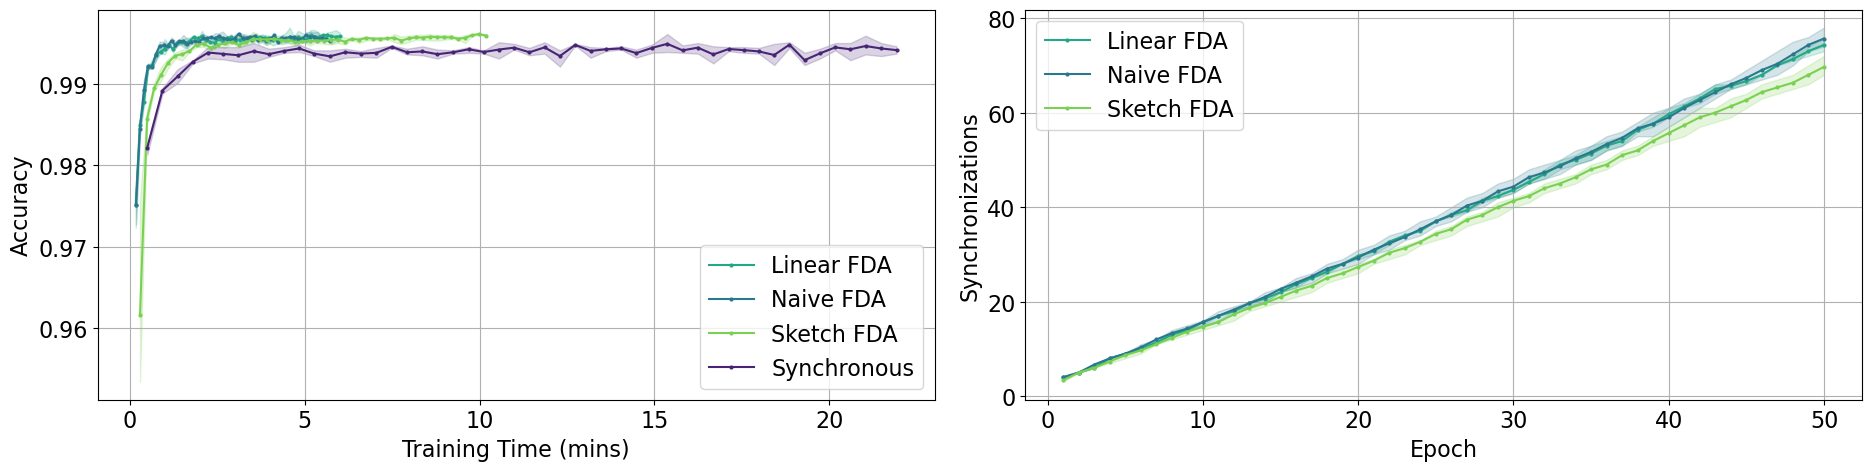

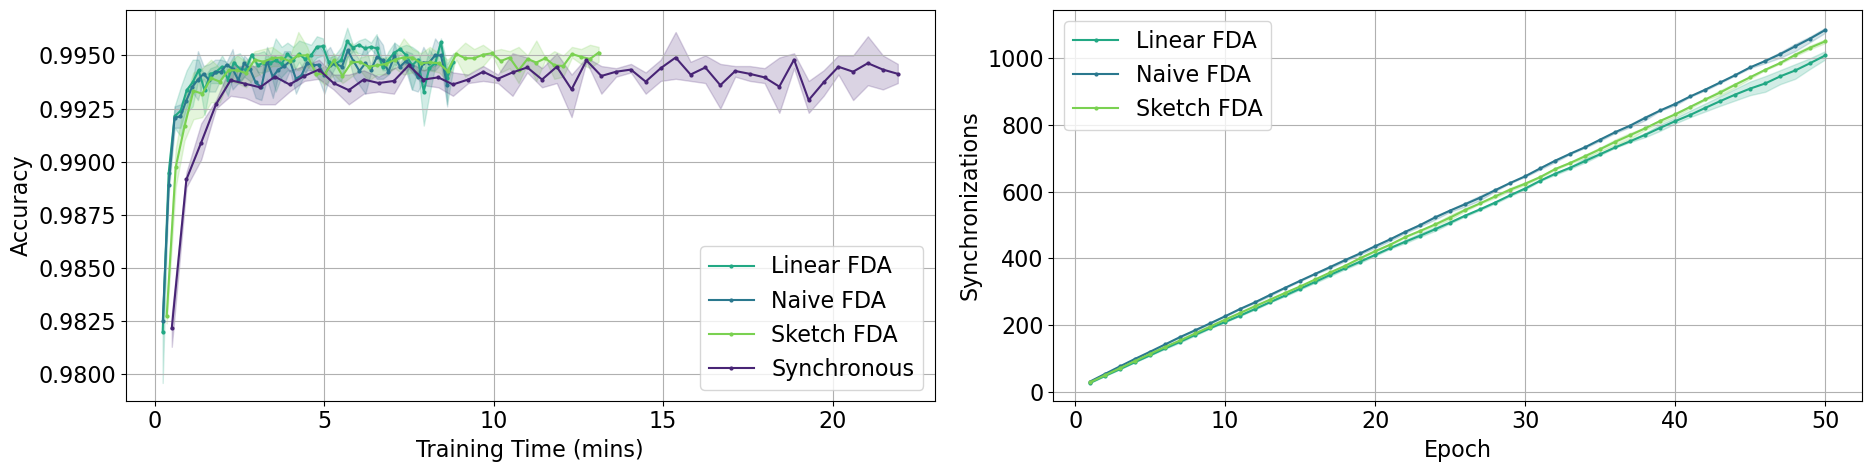

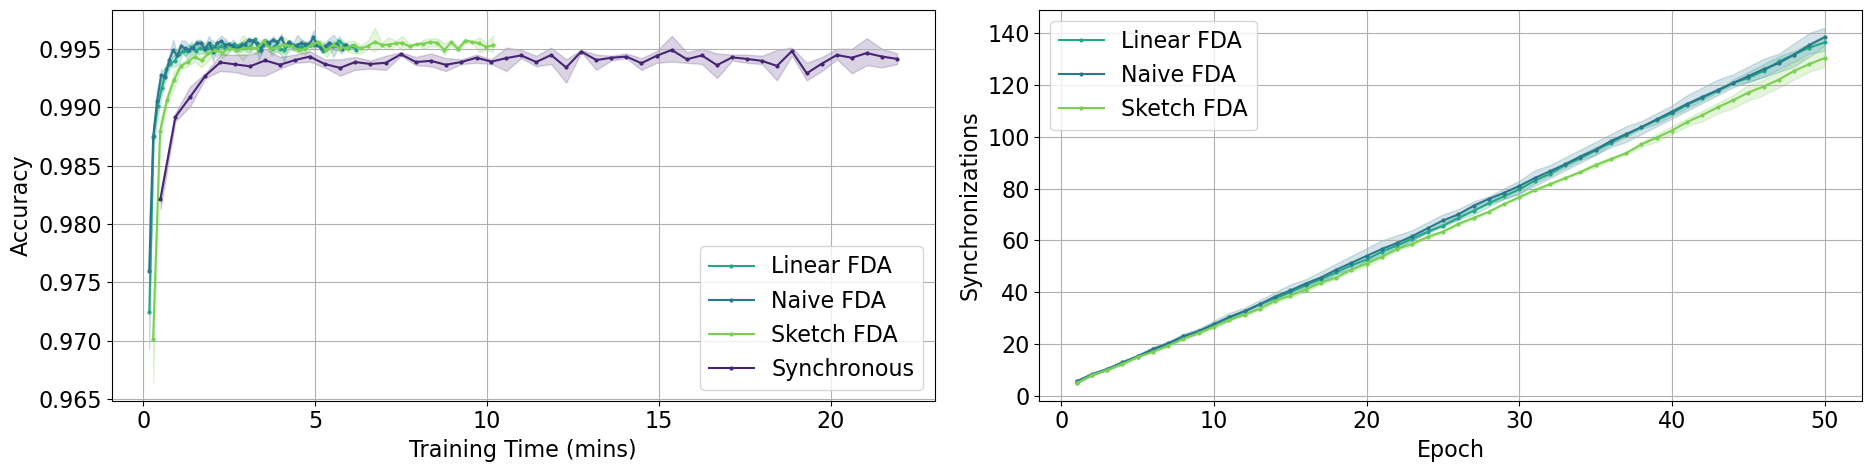

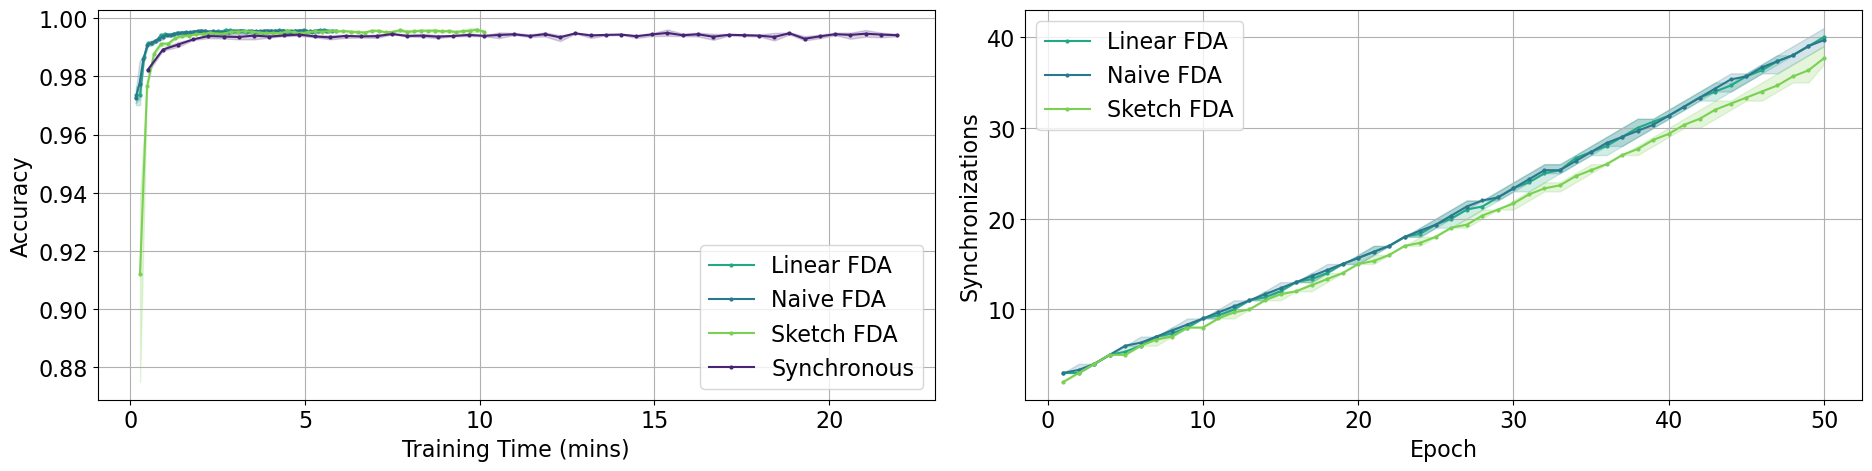

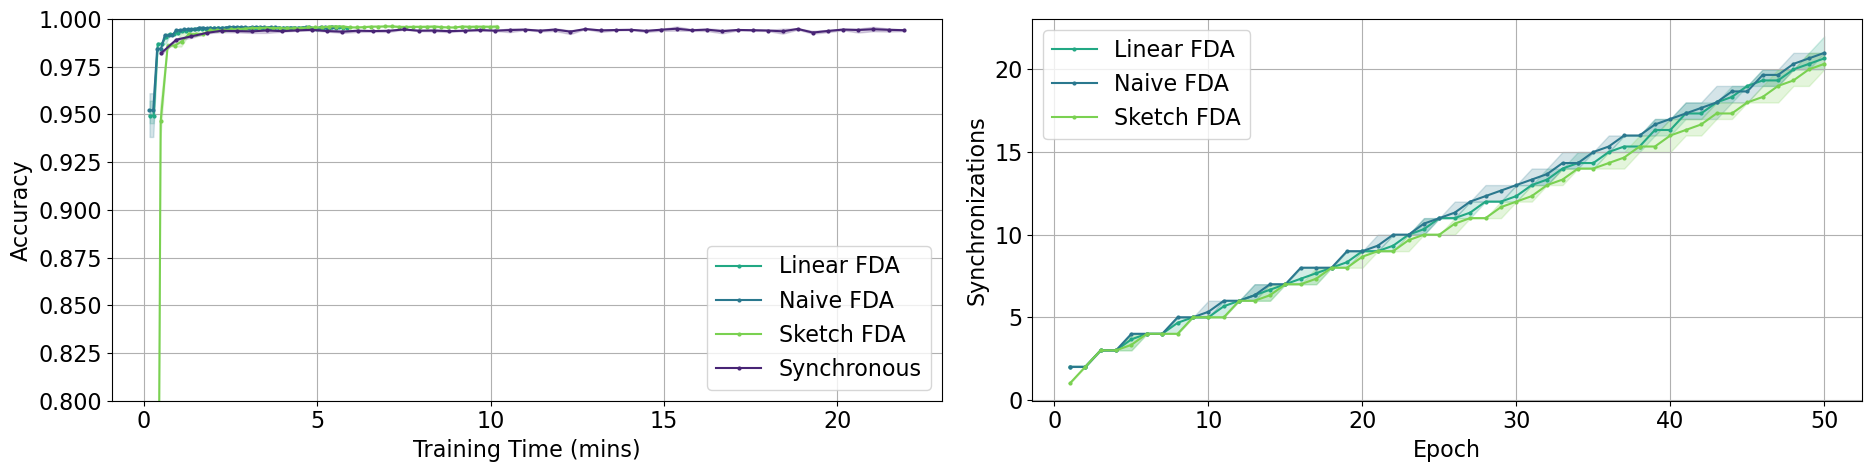

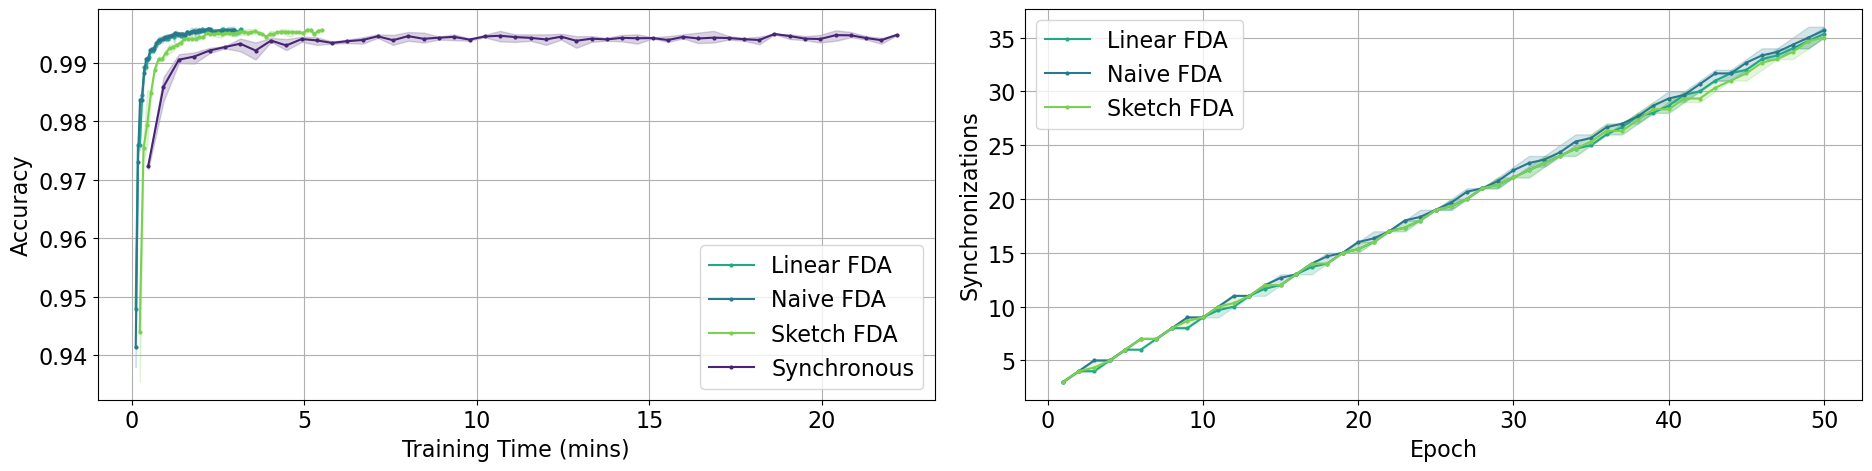

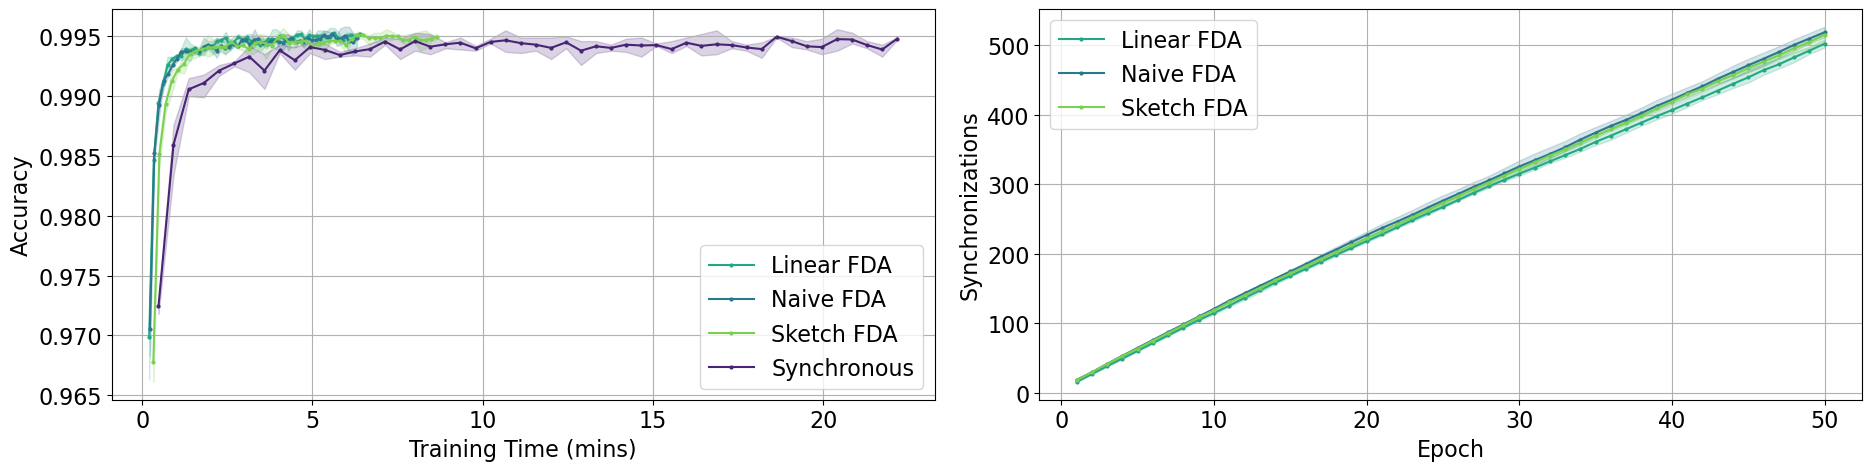

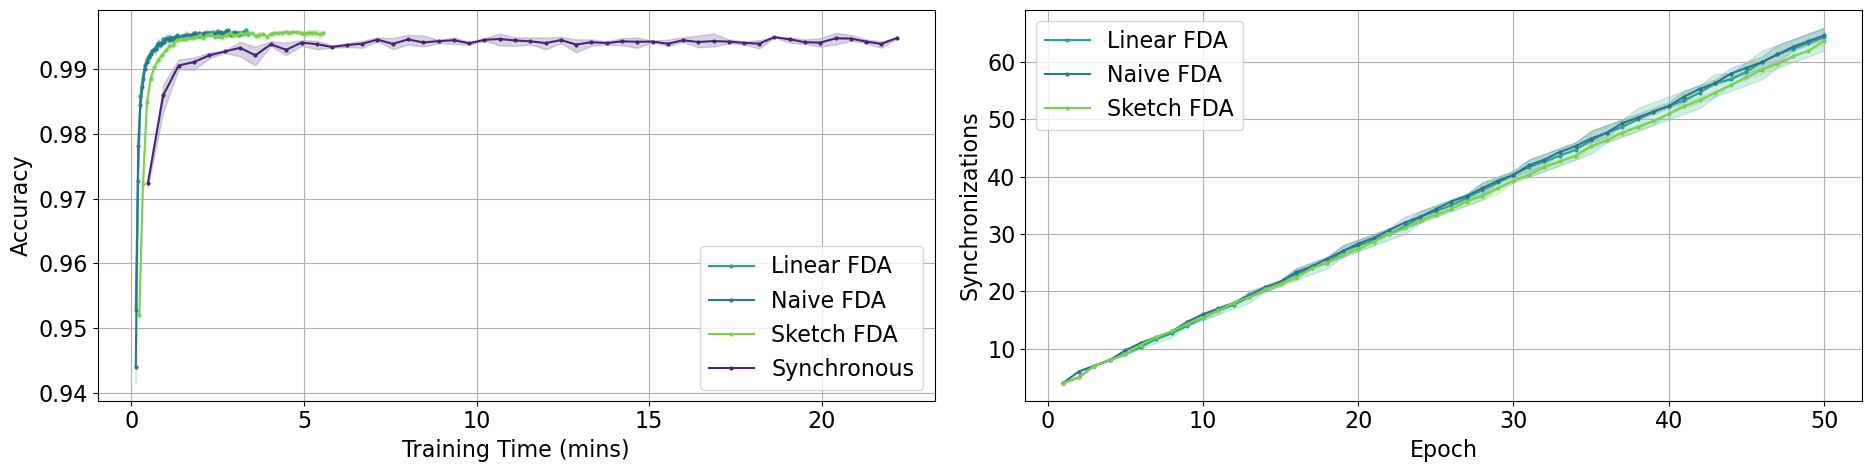

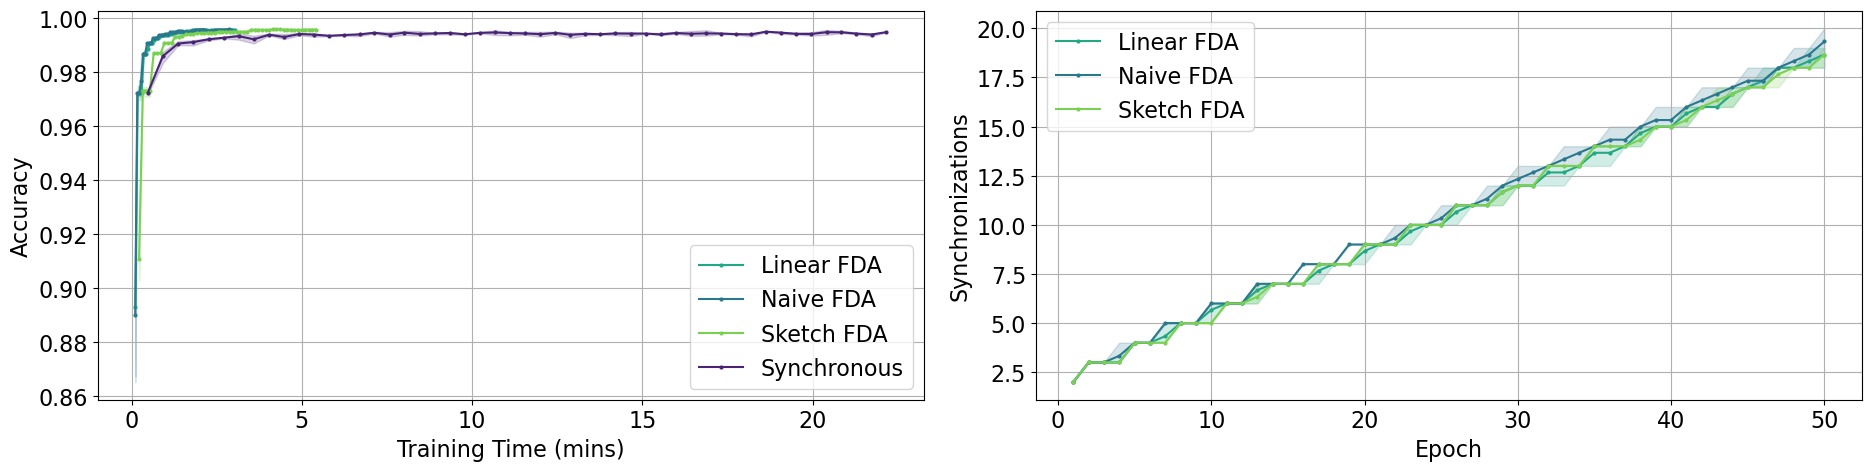

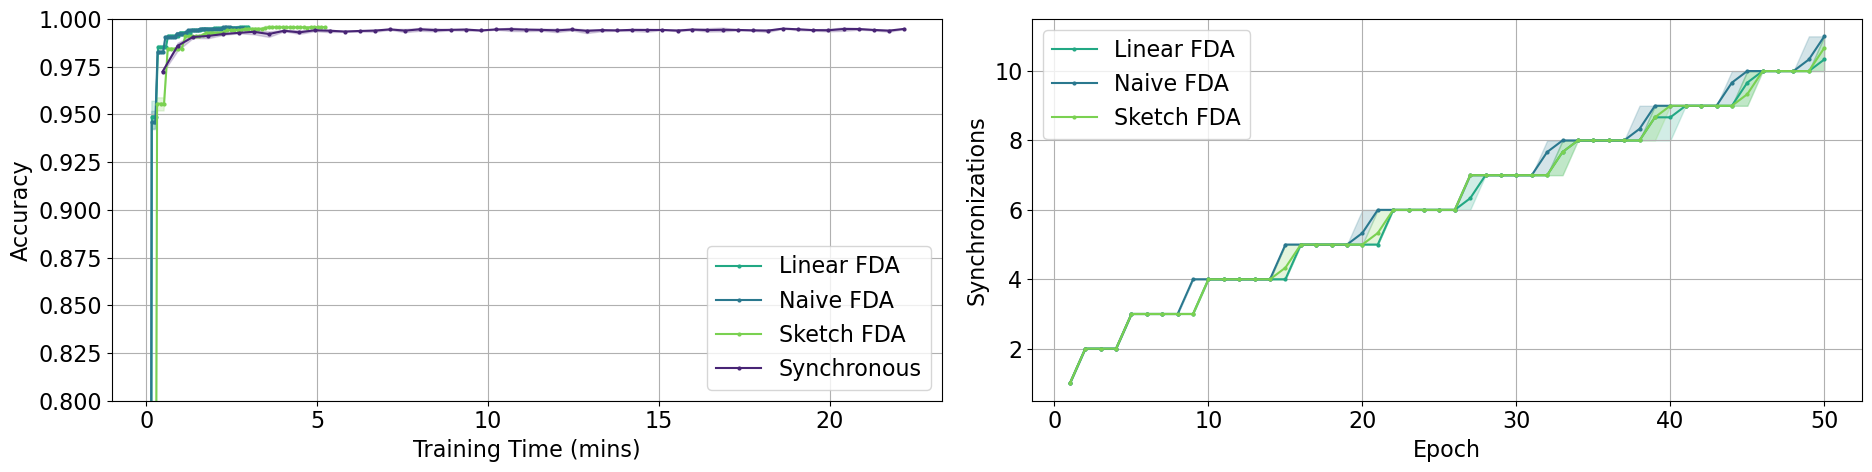

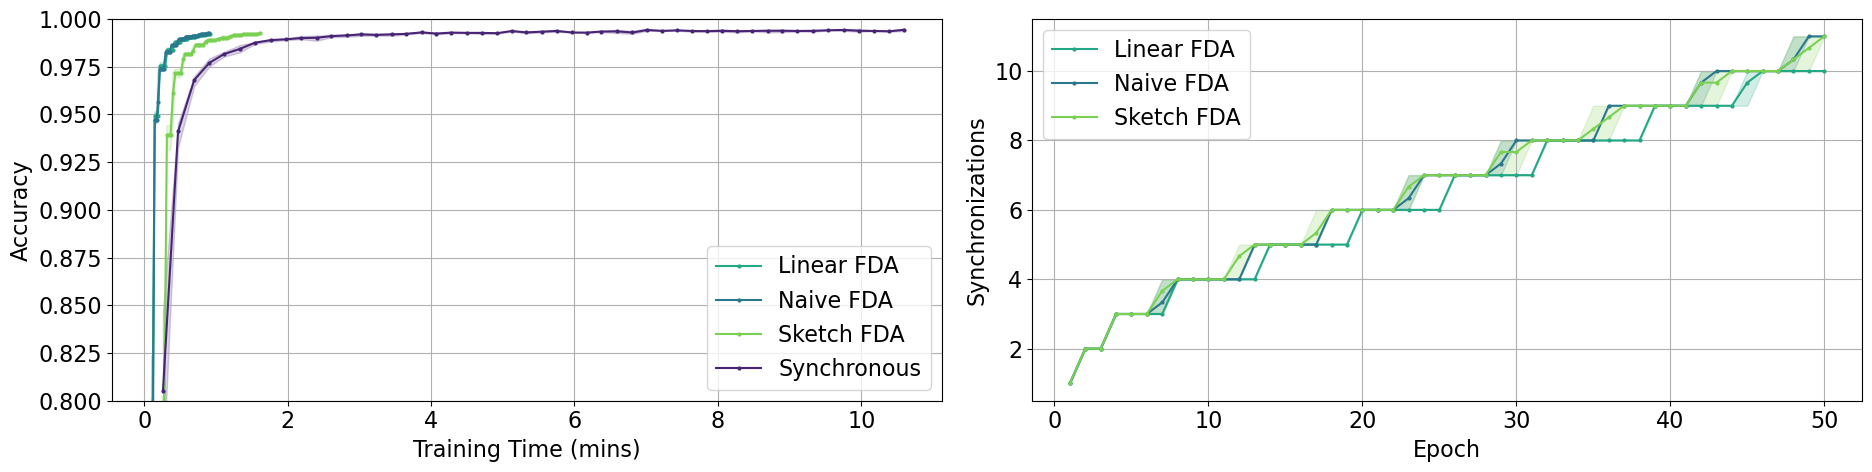

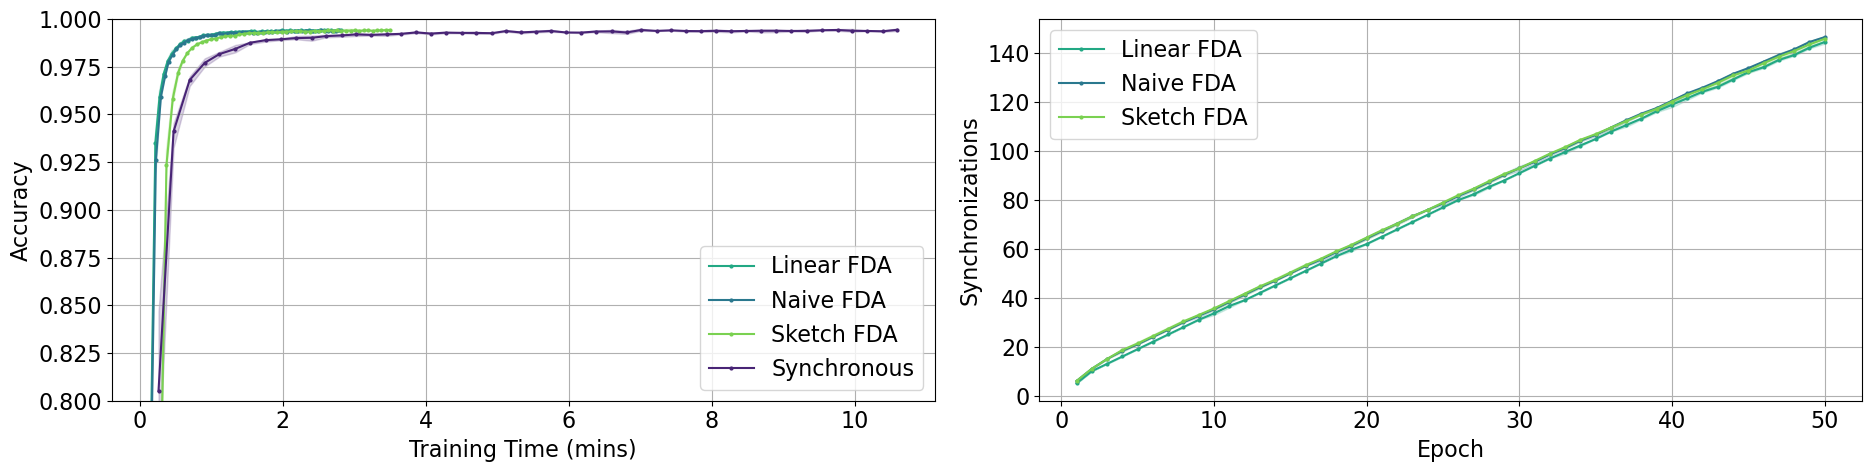

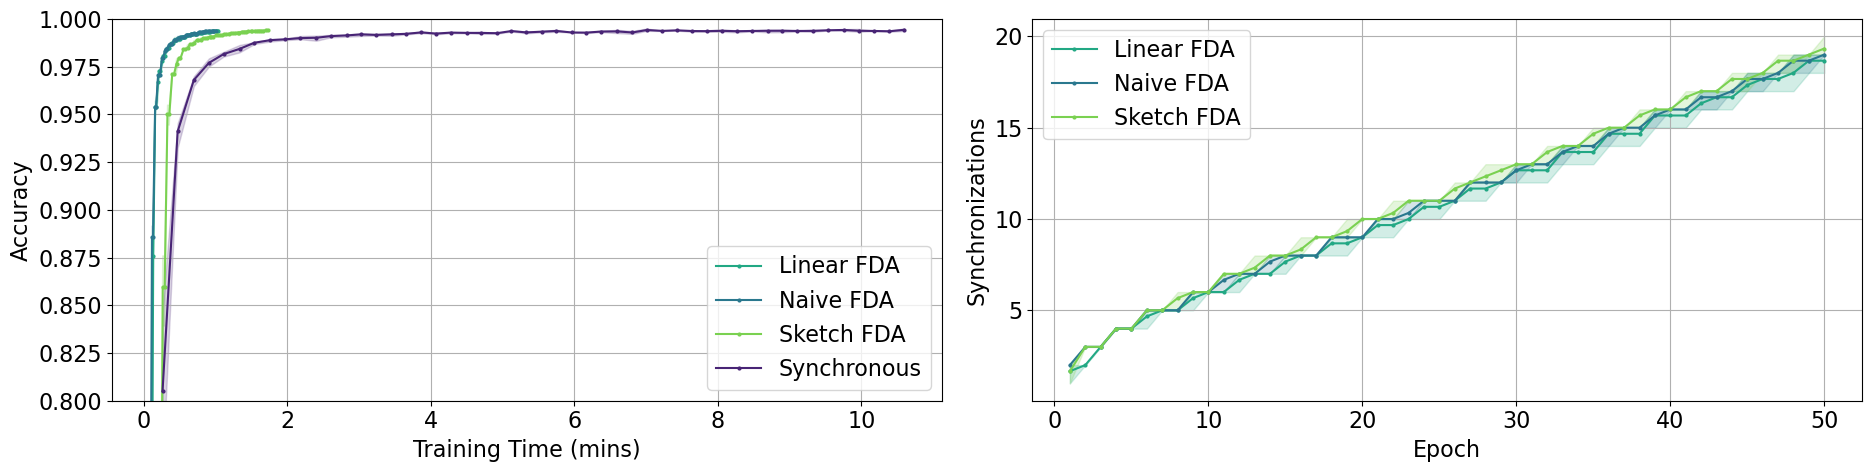

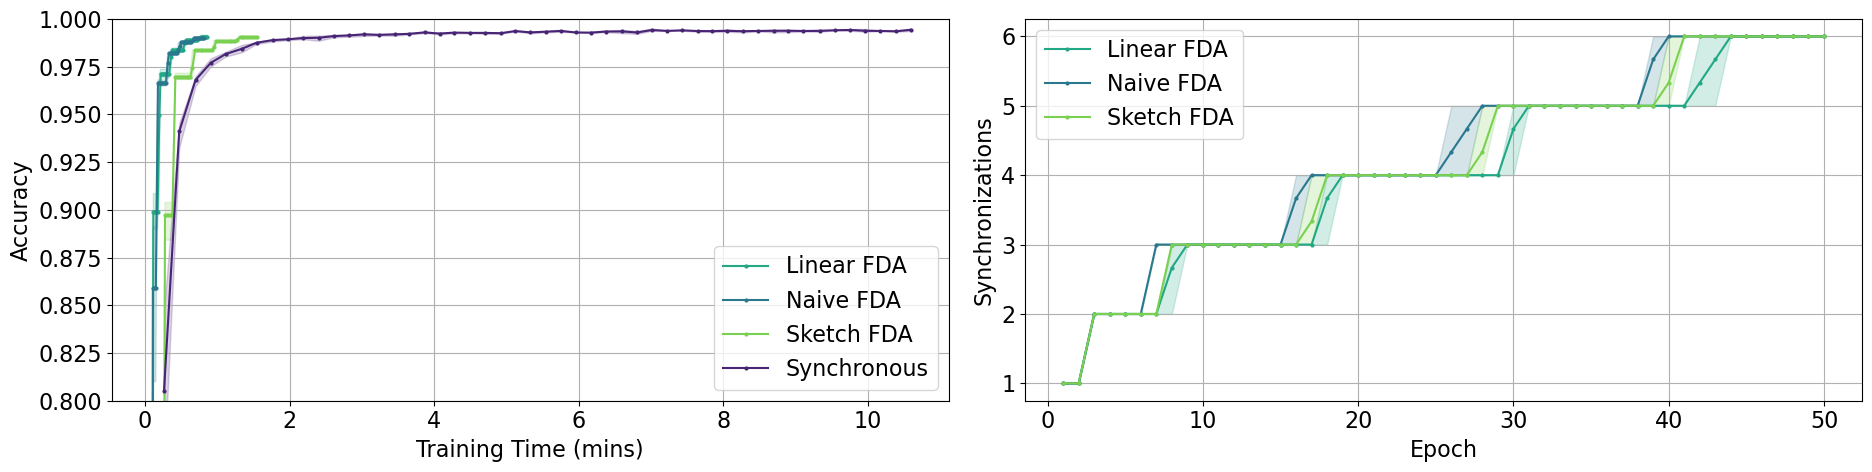

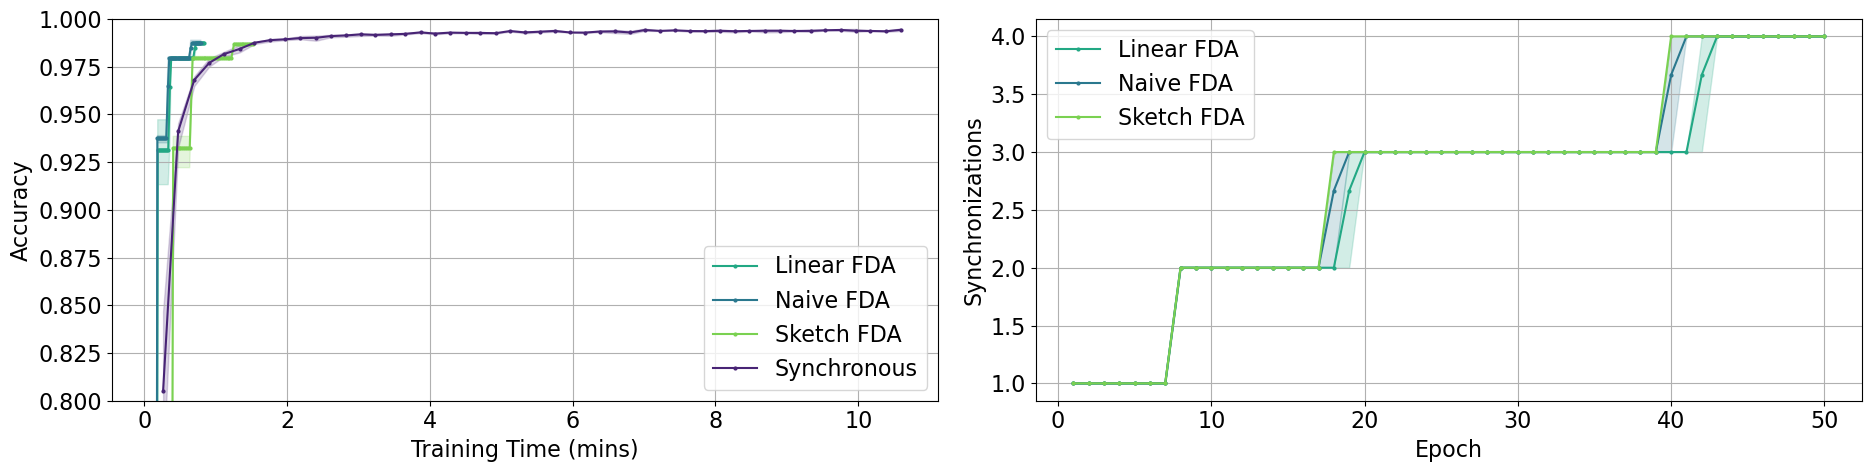

In [8]:
plt.rcParams.update({'font.size': 16})
for clients in (4, 8, 32):
    da = data_analysis("latest_expers")
    da.select_where({'clients': clients, 'batch_size': 128})
    accuracy_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
    syncs_df = da.group_repeated_expers(['threshold', 'algorithm', 'epoch', 'epoch_steps'], 'epoch', 'syncs_y', True)
    accuracy_df = accuracy_df[accuracy_df['epoch']<51]
    distinct_threshold = da.df['info'].dropna()['threshold'].unique()
    plt.rcParams.update({'font.size': 16})


    # For each individual number of threshold
    for threshold in distinct_threshold:
        # Filter the DataFrame for rows where 'threshold' column is equal to the current 'threshold'
        filtered_accuracy_df = accuracy_df[(accuracy_df['threshold'] == threshold) | (accuracy_df['threshold'].isna())]
        filtered_syncs_df = syncs_df[(syncs_df['threshold'] == threshold) & (syncs_df['algorithm'] != 'synchronous')]

        # Create a new figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 5))

        # Plot for filtered_accuracy_df
        for key, group in filtered_accuracy_df.groupby('algorithm'):
            ax1.plot(group['time_mean'] / 60, group['accuracy_mean'], label=algo_labels[key], marker='o', markersize=2, color=algo_colors[key])
            ax1.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])
            if key == 'sketch':
                print(group['accuracy_mean'].iloc[0])
                if group['accuracy_mean'].iloc[0] < 0.8:
                    ax1.set_ylim(0.8,1)

        # Add title, labels, and legend for the first subplot
        ax1.set_xlabel("Training Time (mins)")
        ax1.set_ylabel("Accuracy")
        ax1.legend()

        # Plot for filtered_syncs_df
        for key, group in filtered_syncs_df.groupby('algorithm'):
            ax2.plot(group['epoch'], group['syncs_y_mean'], marker='o', markersize=2, label=algo_labels[key], color=algo_colors[key])
            ax2.fill_between(group['epoch'], group['syncs_y_min'], group['syncs_y_max'], alpha=0.2, color=algo_colors[key])
            if key == 'linear':
                steps = group['epoch_steps'].iloc[-1] * 50
                ax2.text(0.95, 0.05, str(steps)+" synchronizations for \"Synchronous\"", ha='right', va='bottom', transform=ax2.transAxes, fontsize=15, color=algo_colors["synchronous"])

        # Add title, labels, and legend for the second subplot
        ax2.set_xlabel("Epoch")
        ax2.set_ylabel("Synchronizations")
        ax2.legend()

        # Adjust layout to prevent overlap
        plt.tight_layout()
        
        # Show the plot
        ax1.grid()
        ax2.grid()

        plt.savefig("figures/accuracy_syncs-threshold_"+str(threshold)+"_clients_"+str(clients)+".pdf")

## Network Topologies

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.path_graph(32)  # An example graph
center_node = 0  # Or any other node to be in the center
edge_nodes = set(G) - {center_node}
# Ensures the nodes around the circle are evenly distributed
pos = nx.circular_layout(G.subgraph(edge_nodes))
pos[center_node] = np.array([0, 0])  # manually specify node position

for node in range(1, 31):
    G.remove_edge(node, (node + 1) % 32)

for node in range(1,32):
    G.add_edge(node, 0)

nx.draw(G, pos, with_labels=True)
plt.savefig("figures/star.pdf")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.path_graph(32)  # An example graph

# Ensures the nodes around the circle are evenly distributed
pos = nx.circular_layout(G)

# Connect node 31 to node 0
G.add_edge(31, 0)

nx.draw(G, pos, with_labels=True)
plt.savefig("figures/ring.pdf")

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph(
[
    ("0", "1"),
    ("0", "2"),
    ("1", "3"),
    ("1", "4"),
    ("2", "5"),
    ("2", "6"),
    ("3", "7"),
    ("3", "8"),
    ("4", "9"),
    ("4", "10"),
    ("5", "11"),
    ("5", "12"),
    ("6", "13"),
    ("6", "14"),
    ("7", "15"),
    ("7", "16"),
    ("8", "17"),
    ("8", "18"),
    ("9", "19"),
    ("9", "20"),
    ("10", "21"),
    ("10", "22"),
    ("11", "23"),
    ("11", "24"),
    ("12", "25"),
    ("12", "26"),
    ("13", "27"),
    ("13", "28"),
    ("14", "29"),
    ("14", "30"),
    ("15", "31")
]

)

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

# Manually set the y-coordinate of node 31 to be the same as node 15
pos["31"][1] = pos["15"][1]
pos["31"][0] = pos["31"][0] - 0.08

nx.draw(G, pos=pos, with_labels=True, arrows=False)
plt.savefig("figures/binary_tree.pdf")

## Topology Communication Time Distribution

In [4]:
plt.rcParams.update({'font.size': 16})
da = data_analysis("topology_expers")
da.select_where({'topology': 'ring'})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
distinct_clients = da.df['info']['clients'].unique()

da = data_analysis("latest_expers")
da.select_where({'algorithm':'naive', 'batch_size':128, 'clients':32, 'threshold':1})

# Plot for filtered_accuracy_df
for key, group in accuracy_df.groupby('algorithm'):
    plt.plot(group['time_mean'] / 60, group['accuracy_mean'], marker='o', markersize=1, label=algo_labels[key], color=algo_colors[key])

# Add title, labels, and legend for the first subplot
plt.xlabel("Training Time (mins)")
plt.ylabel("Accuracy")
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.grid()

plt.savefig("figures/accuracy-ring.pdf")

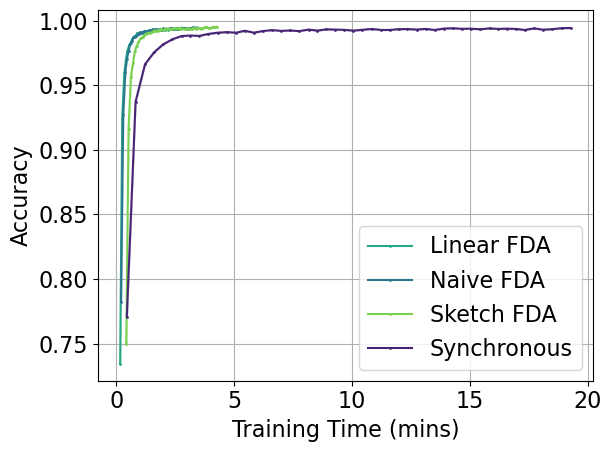

In [45]:
da = data_analysis("topology_expers")
da.select_where({'topology': 'binary_tree'})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
distinct_clients = da.df['info']['clients'].unique()

# For each individual number of clients
for clients in distinct_clients:
    # Filter the DataFrame for rows where 'clients' column is equal to the current 'clients'
    filtered_accuracy_df = accuracy_df[accuracy_df['clients'] == clients]

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        plt.plot(group['time_mean'] / 60, group['accuracy_mean'], marker='o', markersize=1, label=algo_labels[key], color=algo_colors[key])
        plt.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    plt.xlabel("Training Time (mins)")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.grid()

    plt.savefig("figures/accuracy-binary_tree.pdf")

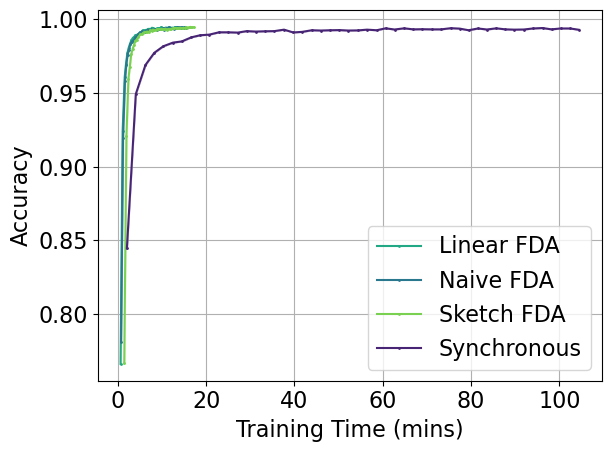

In [46]:
da = data_analysis("topology_expers")
da.select_where({'topology': 'star'})
accuracy_df = da.group_repeated_expers(['clients', 'algorithm', 'epoch'], 'epoch', 'accuracy', True)
distinct_clients = da.df['info']['clients'].unique()

# For each individual number of clients
for clients in distinct_clients:
    # Filter the DataFrame for rows where 'clients' column is equal to the current 'clients'
    filtered_accuracy_df = accuracy_df[accuracy_df['clients'] == clients]

    # Plot for filtered_accuracy_df
    for key, group in filtered_accuracy_df.groupby('algorithm'):
        plt.plot(group['time_mean'] / 60, group['accuracy_mean'], marker='o', markersize=1, label=algo_labels[key], color=algo_colors[key])
        plt.fill_between(group['time_mean'] / 60, group['accuracy_min'], group['accuracy_max'], alpha=0.2, color=algo_colors[key])

    # Add title, labels, and legend for the first subplot
    plt.xlabel("Training Time (mins)")
    plt.ylabel("Accuracy")
    plt.legend()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.grid()

    plt.savefig("figures/accuracy-star.pdf")

Index([0, 2876, 5752, 8628], dtype='int64')


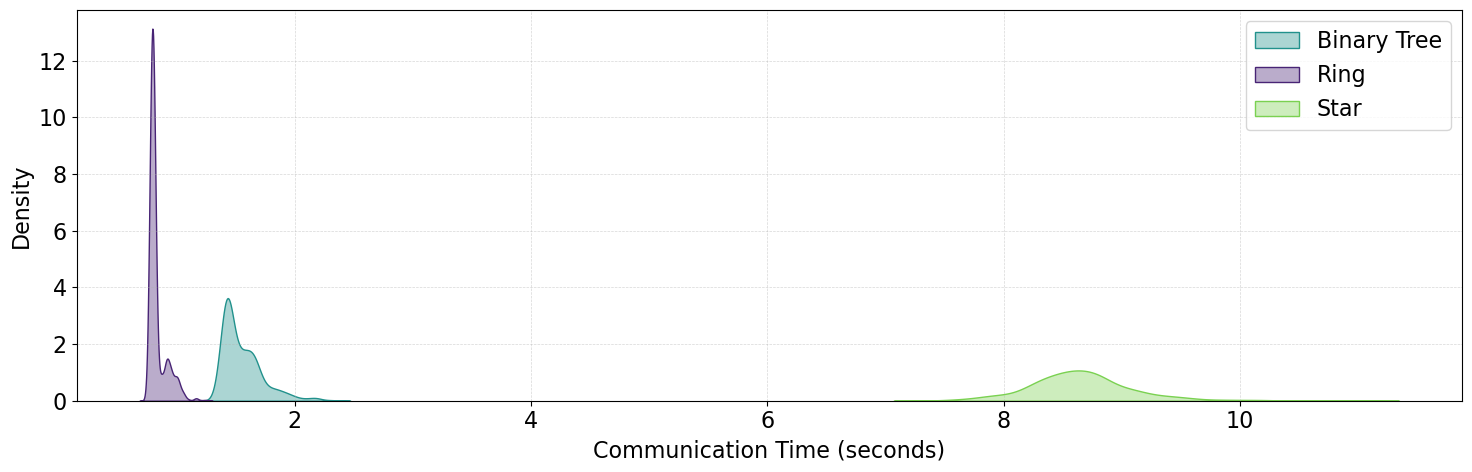

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

da = data_analysis("topology_expers")
da.select_where({'algorithm': 'synchronous'})
da.df['step']['diff_com_time'] = da.df['step']['com_time'].diff()
index_to_drop = da.df['step'][da.df['step']['step'] == 1].index
print(index_to_drop)
da.df['step'].drop(index_to_drop, inplace=True)

plt.figure(figsize=(15, 5))  # Adjust figure size based on your preferences

for key, group in da.df['step'].groupby('topology'):
    sns.kdeplot(group['diff_com_time'], fill=True, label=topology_labels[key], color=topology_colors[key], alpha=0.375)

plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.5)
plt.xlabel('Communication Time (seconds)')
plt.tight_layout()
plt.legend()
plt.savefig("figures/com_time_distr.pdf")


In [16]:
da = data_analysis("latest_expers")
da.select_where({'threshold': 100, 'batch_size': 128, 'clients': 32})
da.df['epoch'] = da.df['epoch'][da.df['epoch']['epoch']==20]
accuracy_df = da.group_repeated_expers([ 'algorithm','clients', 'batch_size', 'threshold', 'epoch'], 'epoch', 'accuracy', True)
accuracy_df.to_csv('file.csv', index=False)
da.df['epoch']

       exper_id    algorithm    model  clients  \
10650       213  synchronous  adv_cnn       32   
10651       213  synchronous  adv_cnn       32   
10652       213  synchronous  adv_cnn       32   
10653       213  synchronous  adv_cnn       32   
10654       213  synchronous  adv_cnn       32   
...         ...          ...      ...      ...   
14095       281       sketch  adv_cnn       32   
14096       281       sketch  adv_cnn       32   
14097       281       sketch  adv_cnn       32   
14098       281       sketch  adv_cnn       32   
14099       281       sketch  adv_cnn       32   

                                          clients_distr  epochs  threshold  \
10650  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]      50        NaN   
10651  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]      50        NaN   
10652  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]      50        NaN   
10653  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]      50        NaN   
10654  [2